# Data Exploration Project: Google Play Store

In this project, we will explore the Google Play Store dataset to gain insights into the app market. The dataset contains information about various apps available on the Google Play Store, such as their category, rating, reviews, and price.

Our goal is to answer the following questions:

- What are the most popular app categories?
- What is the distribution of app ratings?
- Is there a correlation between app size and rating?
- What is the average price of paid apps?

To answer these questions, we will use Python and its data analysis libraries, such as Pandas and Matplotlib. We will start by importing the dataset and cleaning the data, followed by exploratory data analysis and visualization.

In [9]:

%pip install empiricaldist


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12122 sha256=0efab1ce2d59de3d537184972e314c43e0d80a94714581fa90bc780b46ad269c
  Stored in directory: c:\users\jamal\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\9e\6c\a4\6d002e4f35dbe60786322ff8e3032ddab20898164bd3d1c37f
Successfully built empiricaldist
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install missingno


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.1 MB 6.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.3/44.1 MB 29.0 MB/s eta 0:00:02
   ------ --------------------------------- 6.7/44.1 MB 53.7 MB/s eta 0:00:01
   ---------- ----------------------------- 11.7/44.1 MB 93.0 MB/s eta 0:00:01
   -------------- ------------------------- 15.8/44.1 MB 93.0 MB/s eta 0:00:01
   ------------------- -------------------- 21.3/44.1 MB 93.0 MB/s eta 0:00:01
   ------------------------ --------------- 26.7/44.1 MB 110.0 MB/s eta 0:00:01
   ---------------------------- ----------- 31.1/44.1 MB 93.9 MB/s eta 0:00:01
   -------------------------------- ------- 36.2/44.1 MB 108.8 MB/s eta 0:0

In [13]:
%pip install numpy pandas empiricaldist tqdm matplotlib seaborn missingno colorama

# Base libraries
import time
import datetime
import os

# Scientific libraries
import numpy as np
import pandas as pd
from empiricaldist import Cdf, Pmf

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno as msno  # Visualize missing values

# Helper libraries
from tqdm.notebook import tqdm, trange
from colorama import Fore, Back, Style
import warnings
warnings.filterwarnings('ignore')

# Visual setup
import matplotlib.ticker as ticker
plt.style.use('ggplot')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

# Pandas options
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Seed value for numpy.random
np.random.seed(42)

Note: you may need to restart the kernel to use updated packages.


In [16]:
apps = pd.read_csv('Google-Playstore.csv')
print(apps.shape)
print(apps.columns)
print(apps.dtypes)
print(apps.describe())


(2312944, 24)
Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')
App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Poli

In [18]:
apps.head()
apps.tail()
apps.isnull().sum()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/lic...,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/e...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Veh...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy...,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1...,True,False,False,2021-06-16 12:59:19
2312943,Biliyor Musun - Sonsuz Yarış,com.yyazilim.biliyormusun,Trivia,5.0,12.0,100+,100.0,354,True,0.0,USD,5.2M,5.0 and up,Y Yazılım,NaN,yyazilimdevelop@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://biliyor-musun-sons.flycricke...,True,False,False,2021-06-16 12:59:19


App Name                  5
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Distribution of Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

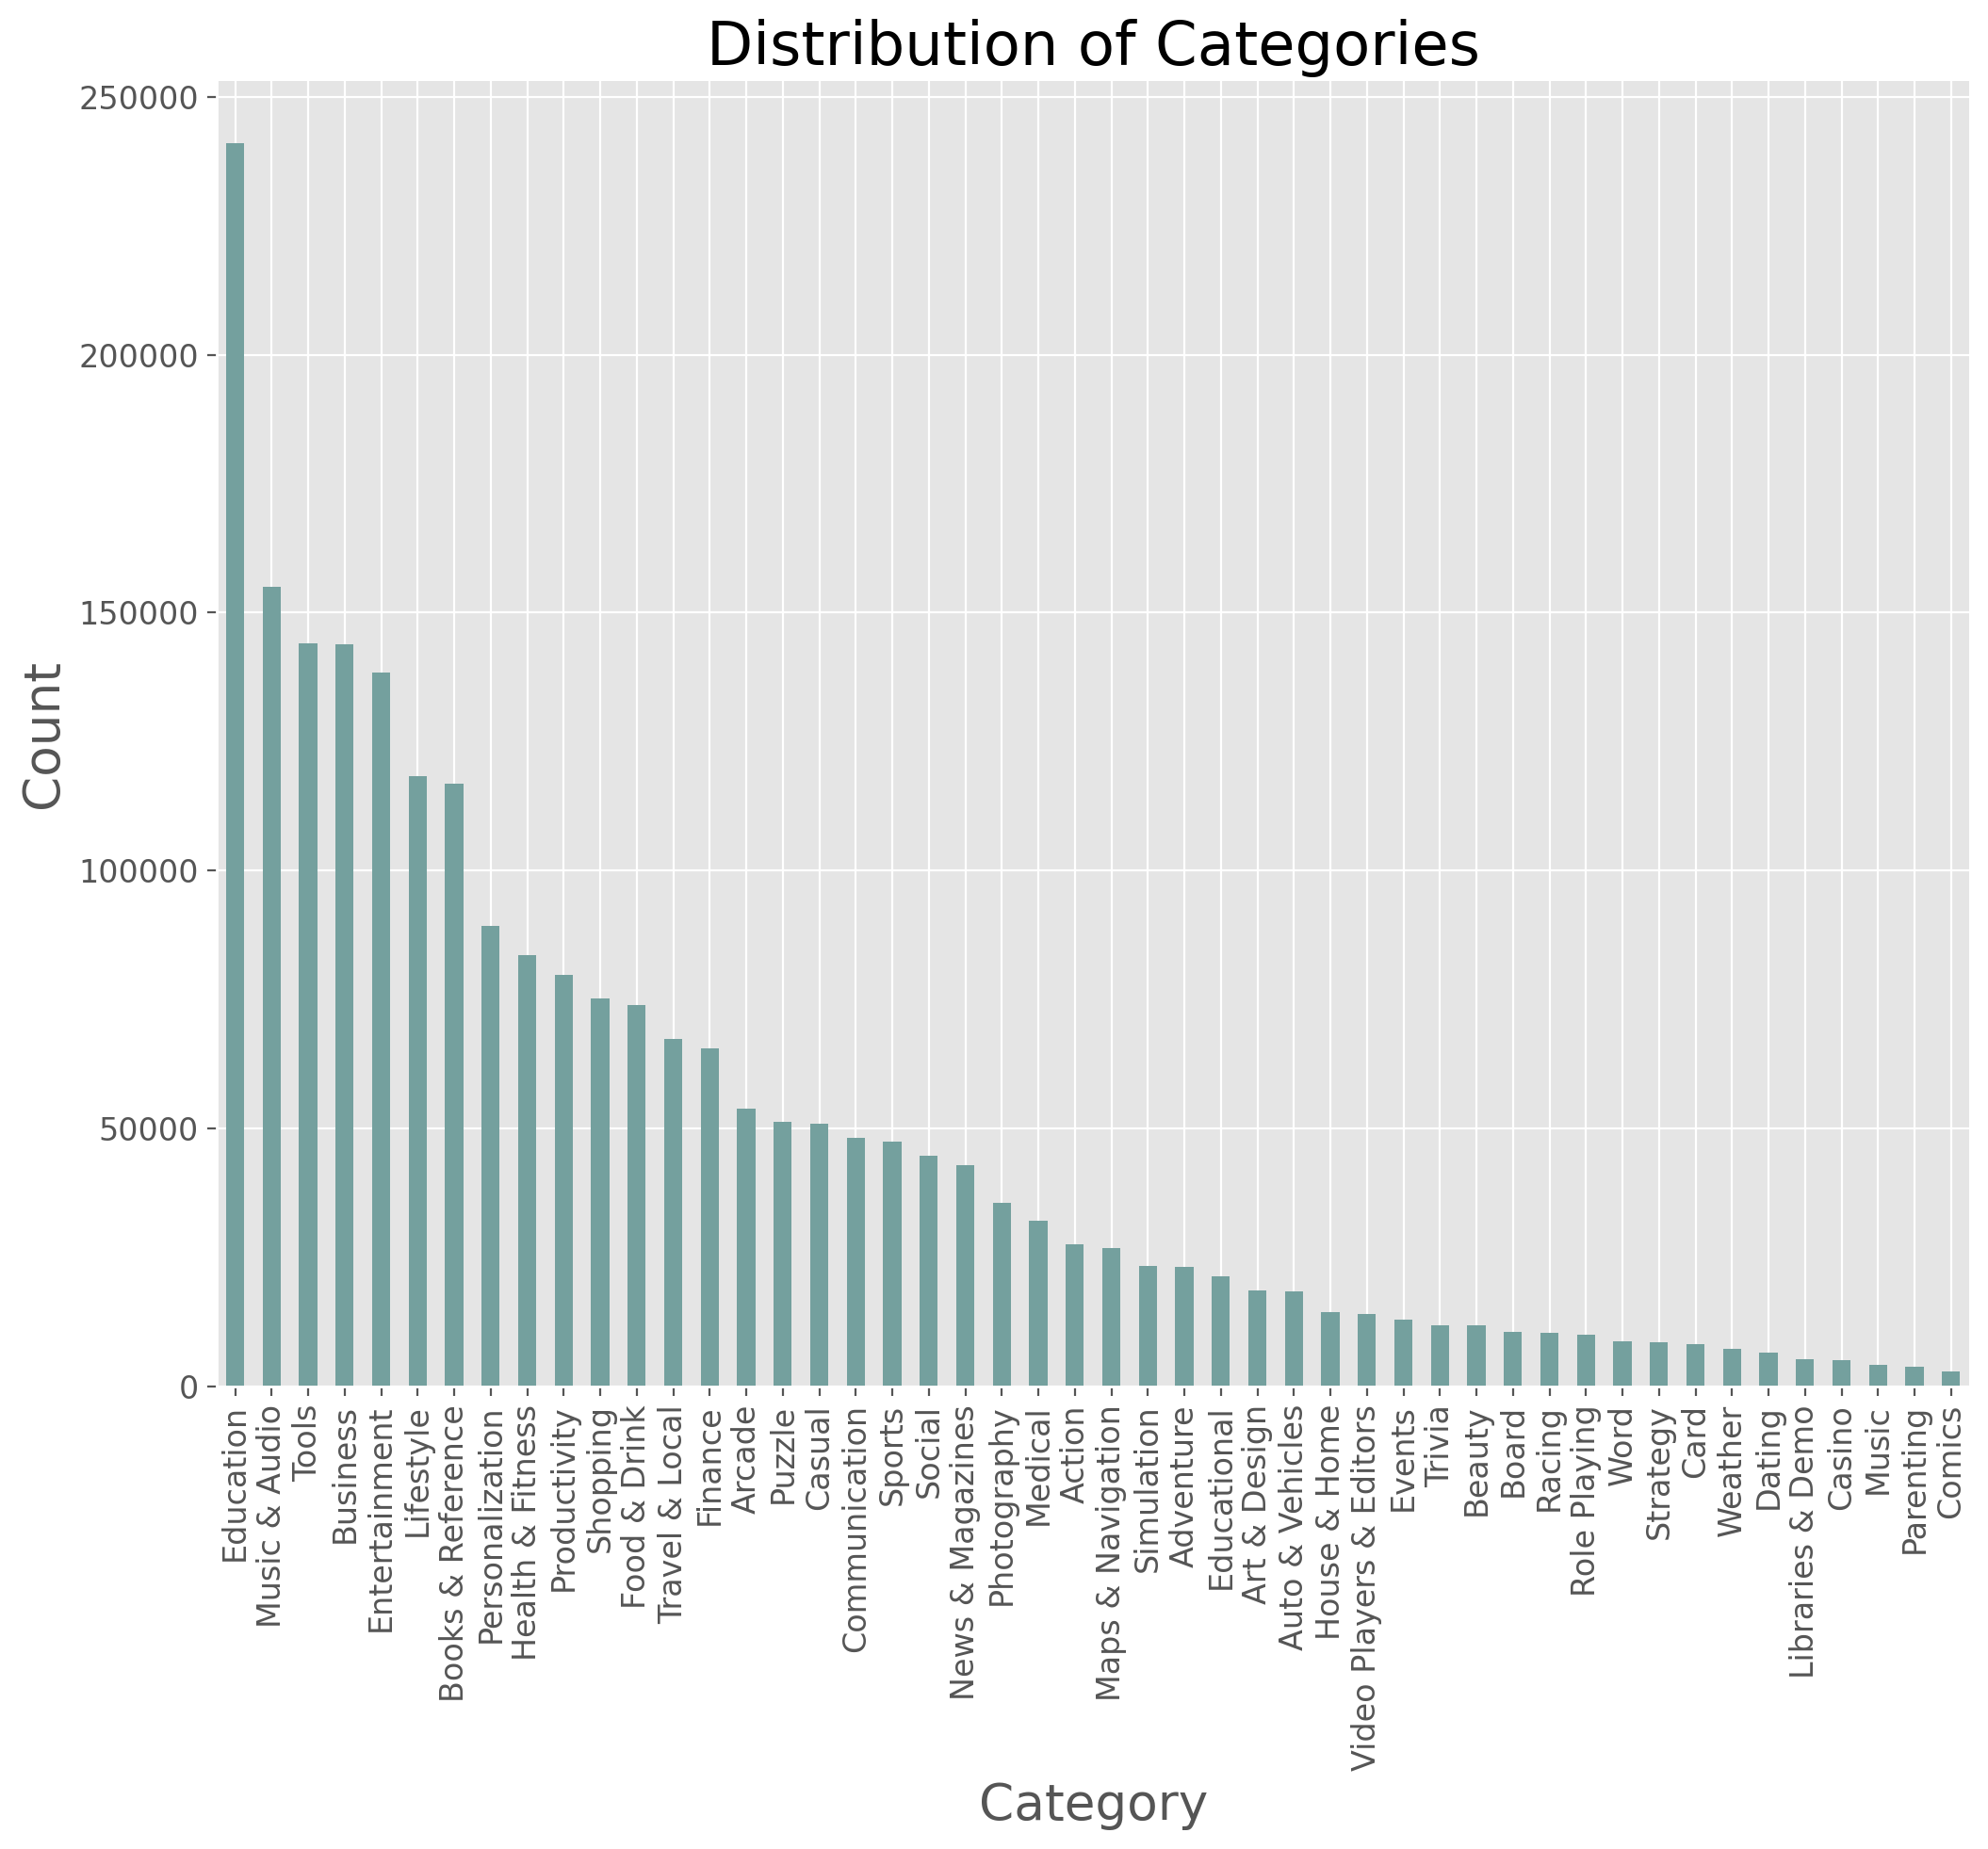

In [19]:

category_counts = apps['Category'].value_counts()
category_counts.plot(kind='bar')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Distribution of Top 5 Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

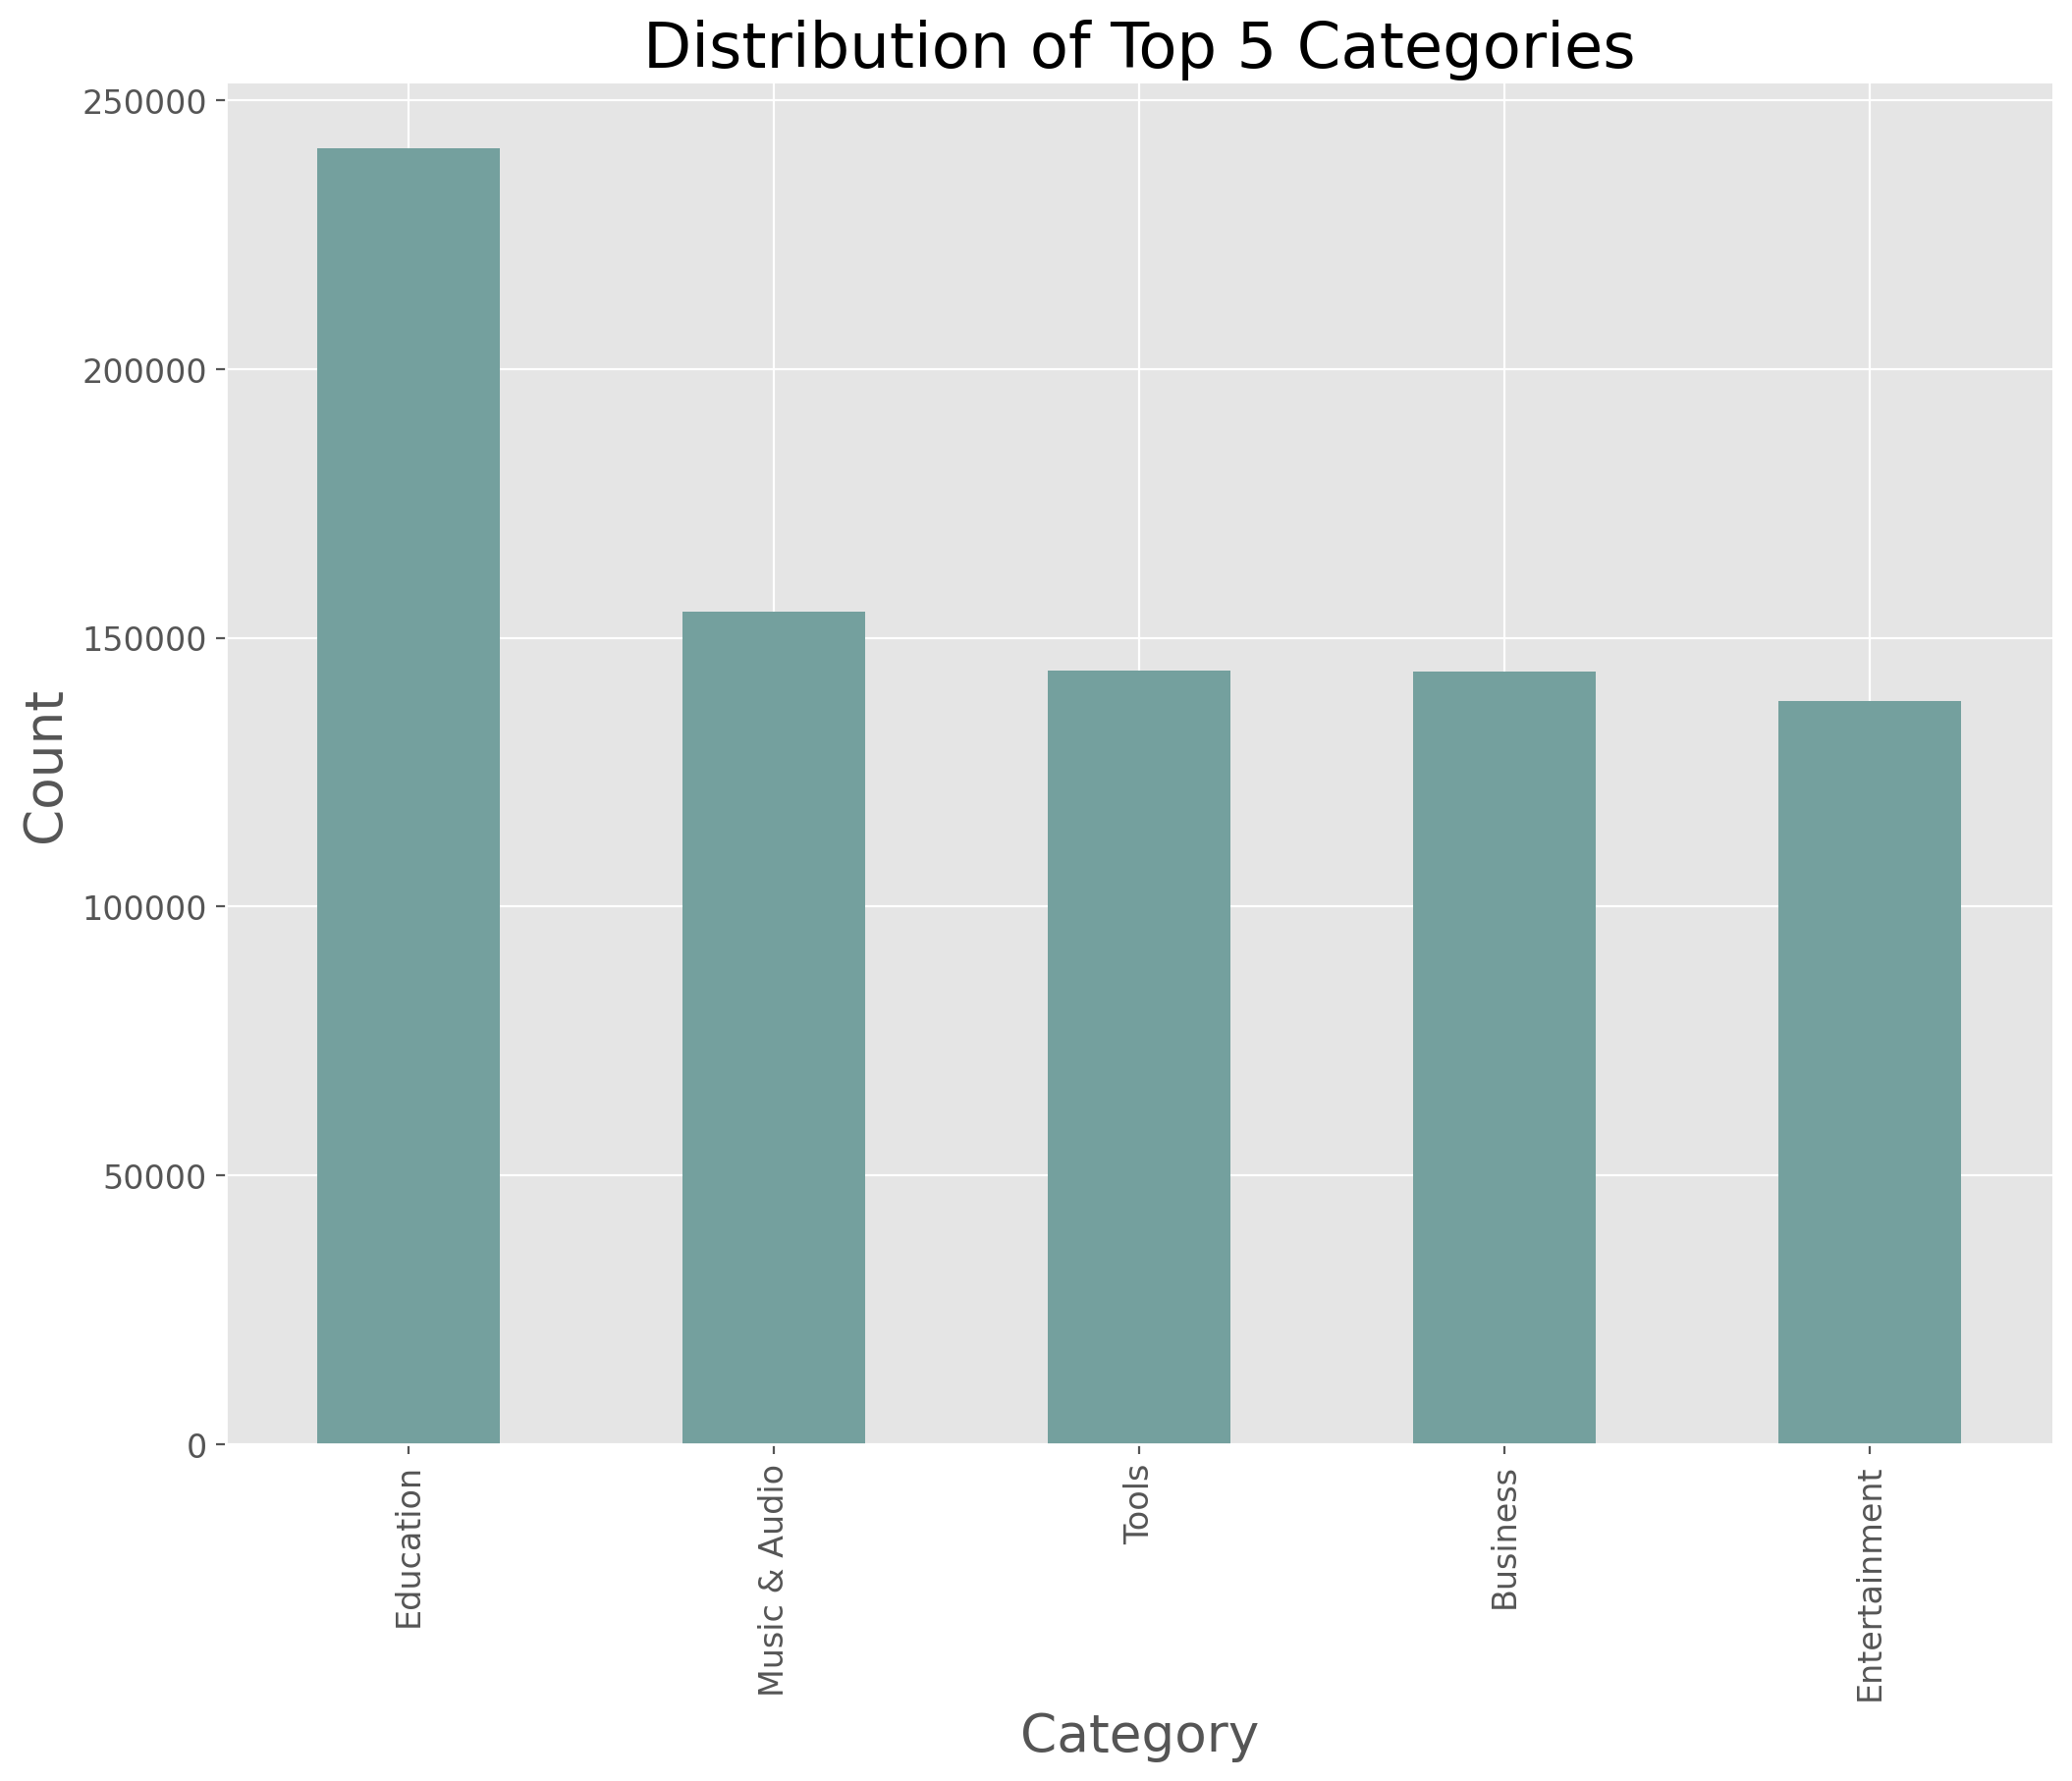

In [20]:
top_categories = apps['Category'].value_counts().nlargest(5)
top_categories.plot(kind='bar')
plt.title('Distribution of Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Distribution of Top 5 Categories')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

[Text(0, 0, ' Education'),
 Text(1, 0, ' Music & Audio'),
 Text(2, 0, ' Tools'),
 Text(3, 0, ' Business'),
 Text(4, 0, ' Entertainment')]

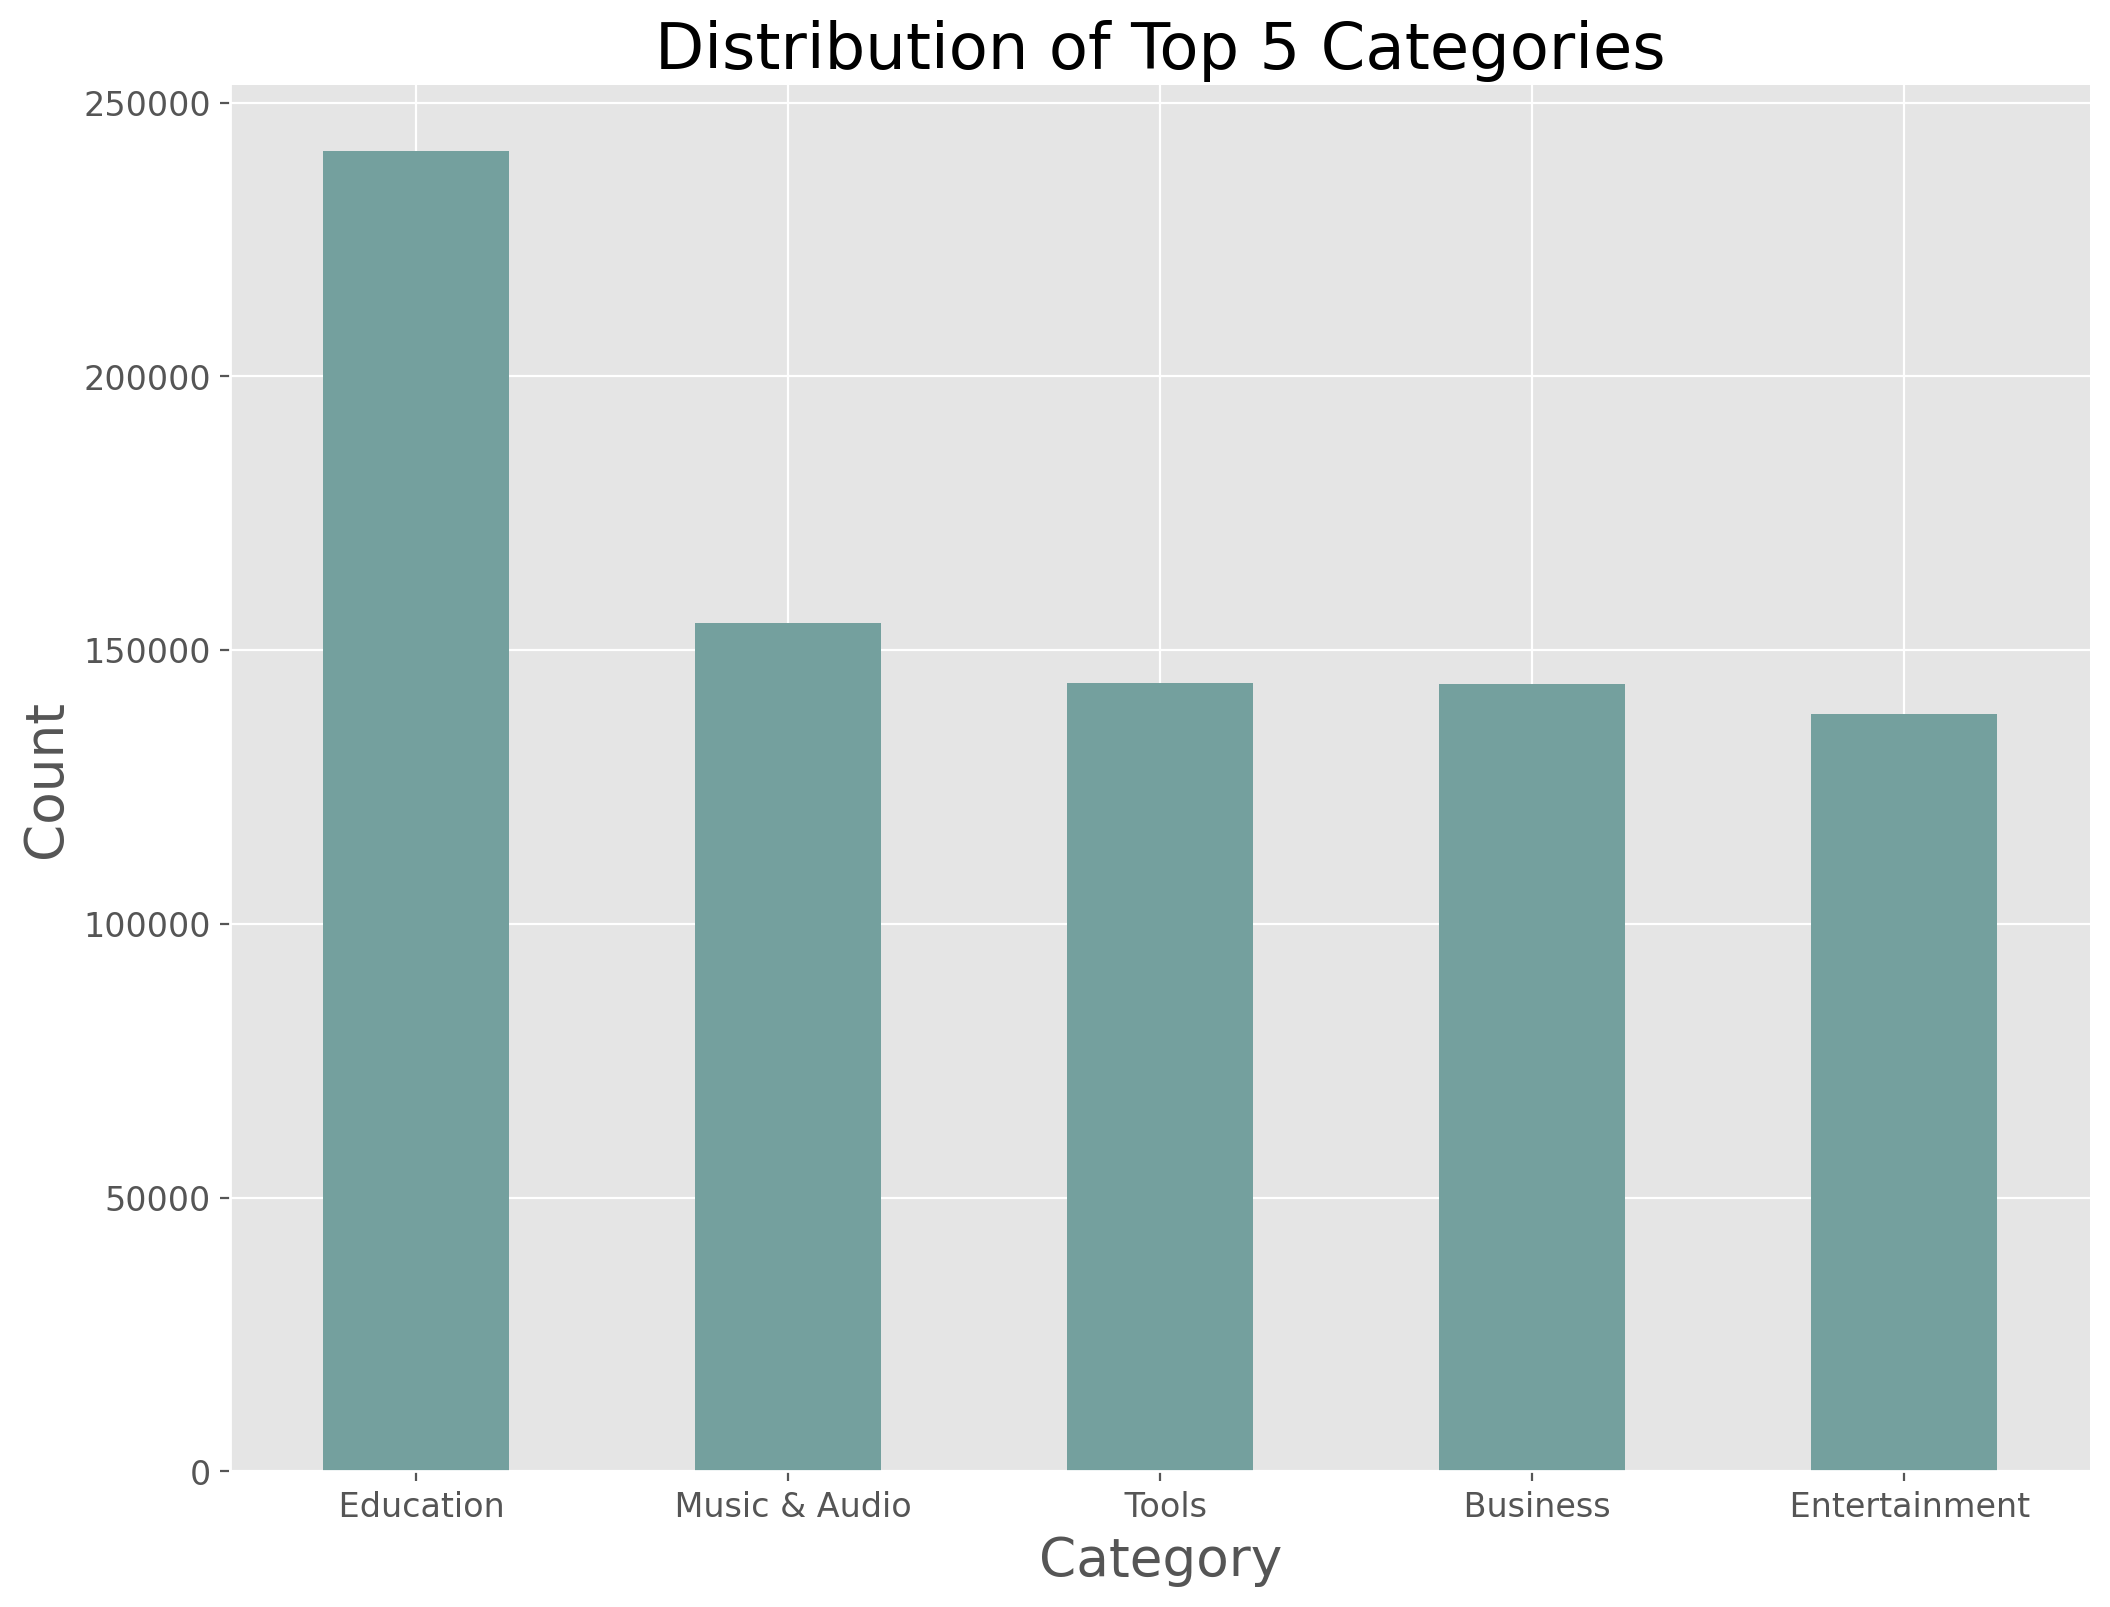

In [24]:
import emoji

# Define a dictionary of category icons
category_icons = {
    'GAME': ':video_game:',
    'FAMILY': ':family:',
    'TOOLS': ':wrench:',
    'MEDICAL': ':ambulance:',
    'BUSINESS': ':briefcase:'
}

# Get the top categories
top_categories = apps['Category'].value_counts().nlargest(5)

# Plot the bar chart with category icons
fig, ax = plt.subplots()
top_categories.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Top 5 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticklabels([emoji.emojize(category_icons.get(cat, '') + ' ' + cat) for cat in top_categories.index], rotation=0)
plt.show()

<Axes: xlabel='Rating', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Ratings')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

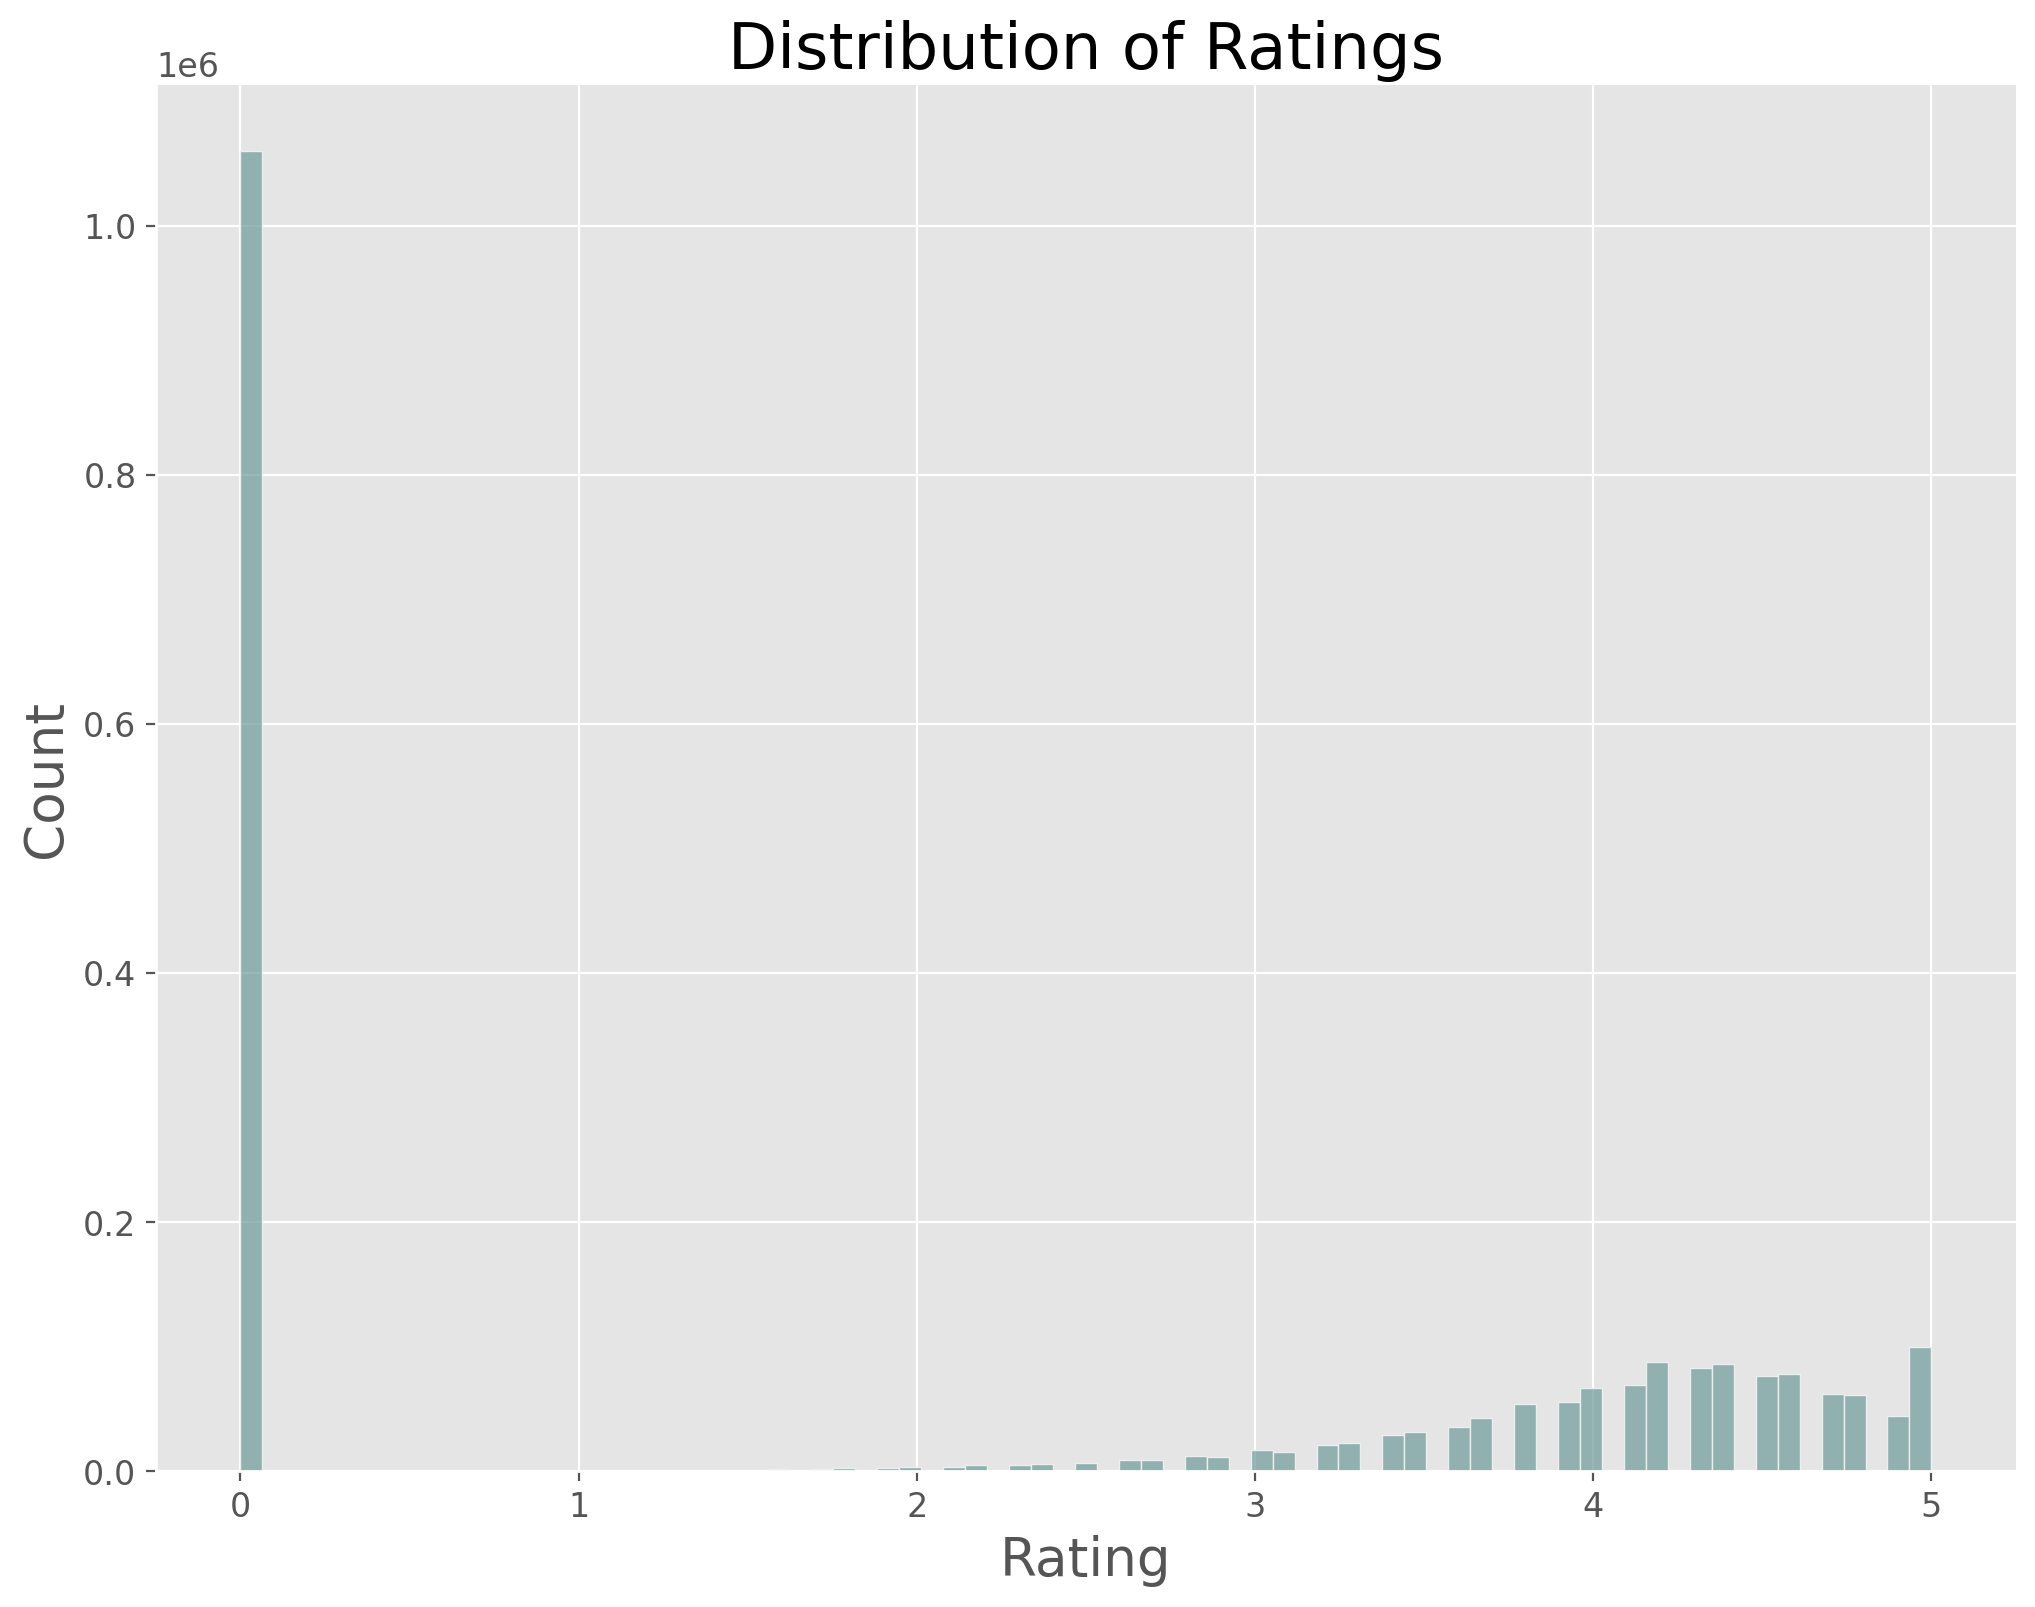

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Assuming "df" is defined in a previous cell
# Plot a histogram of the Rating column
sns.histplot(df['Rating'], kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Rating', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Rating')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

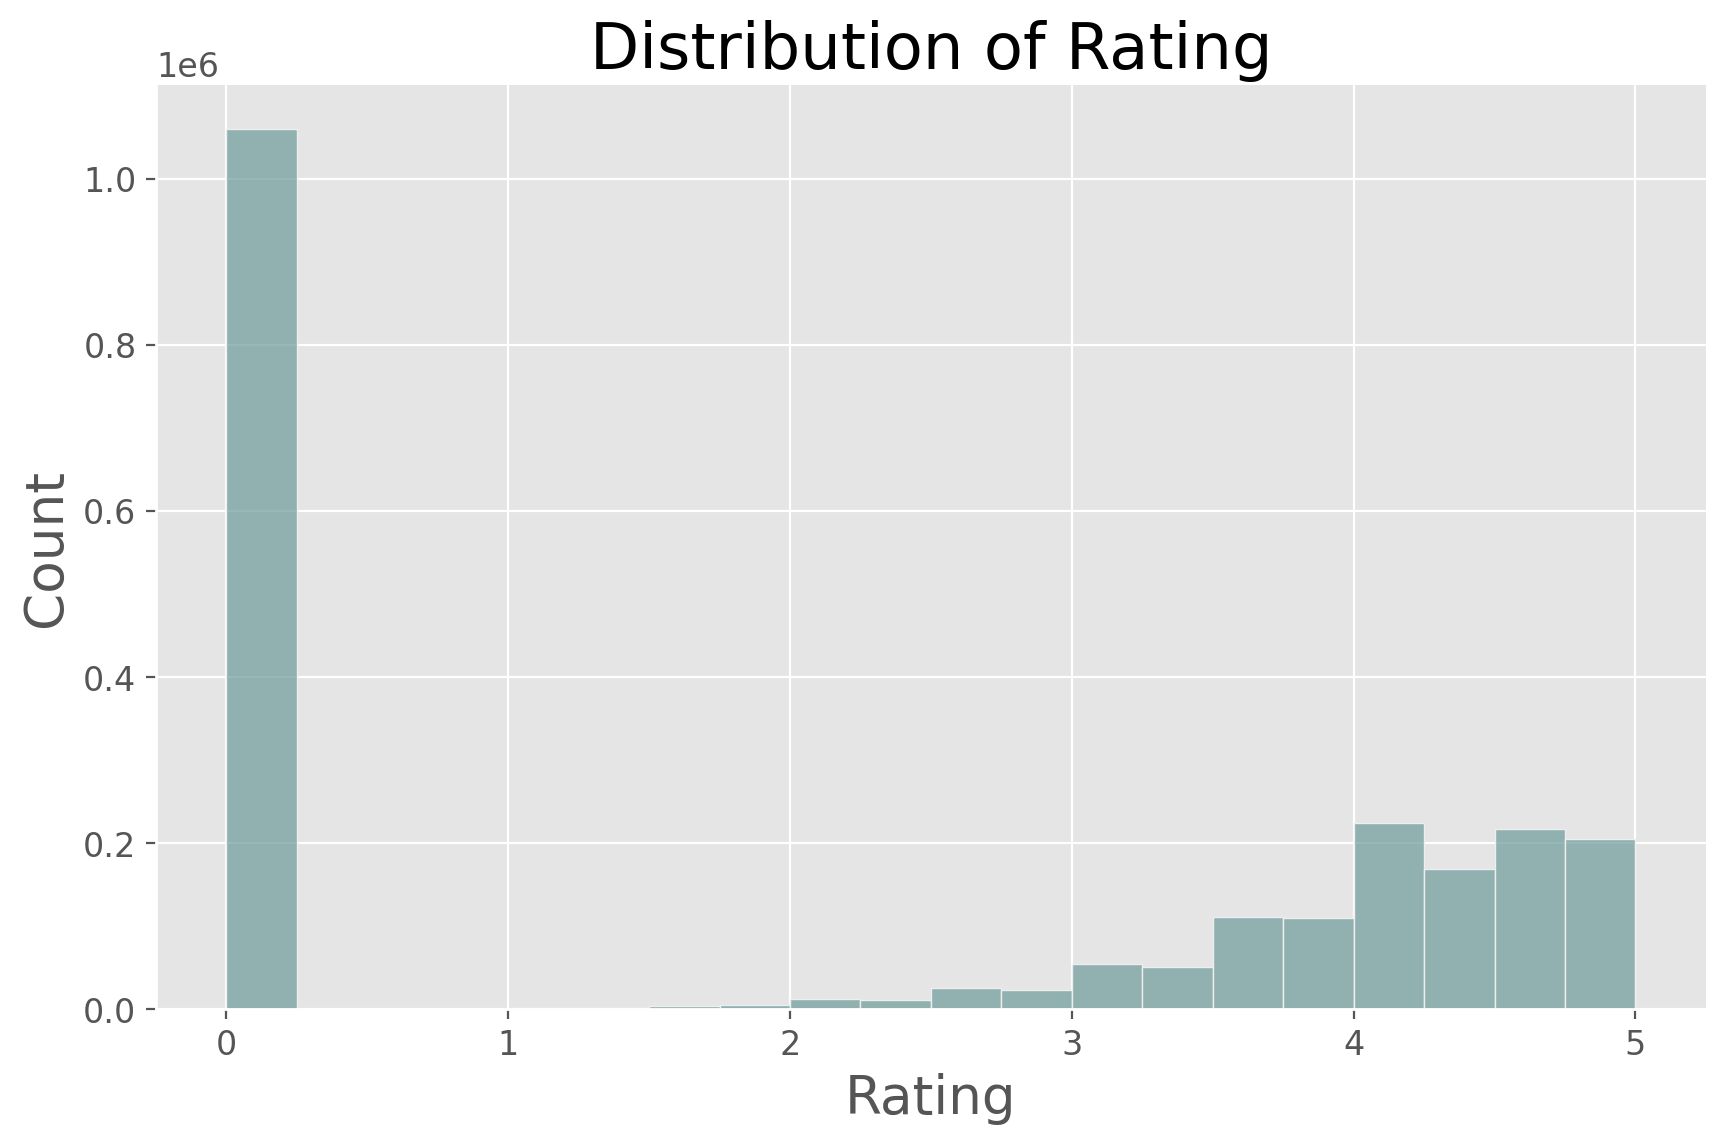

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Rating Count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Rating Count')

Text(0.5, 0, 'Rating Count')

Text(0, 0.5, 'Count')

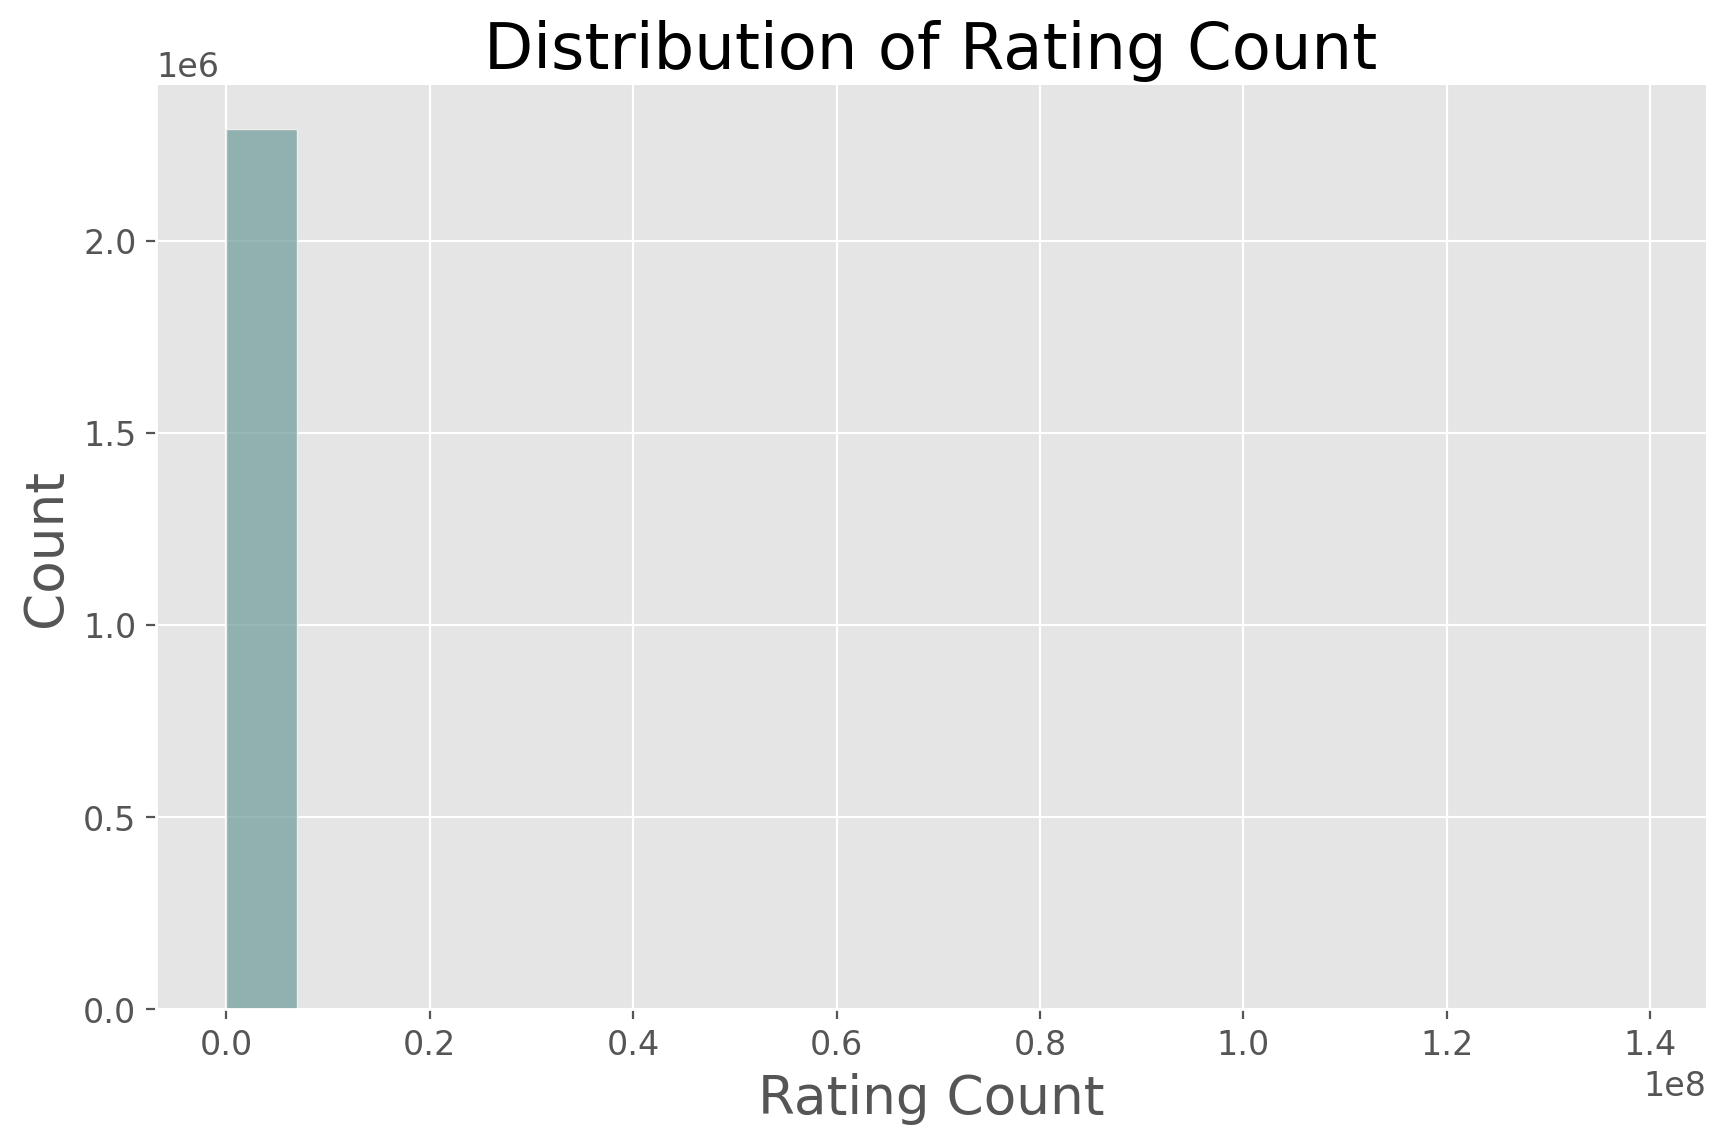

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Installs', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Installs')

Text(0.5, 0, 'Installs')

Text(0, 0.5, 'Count')

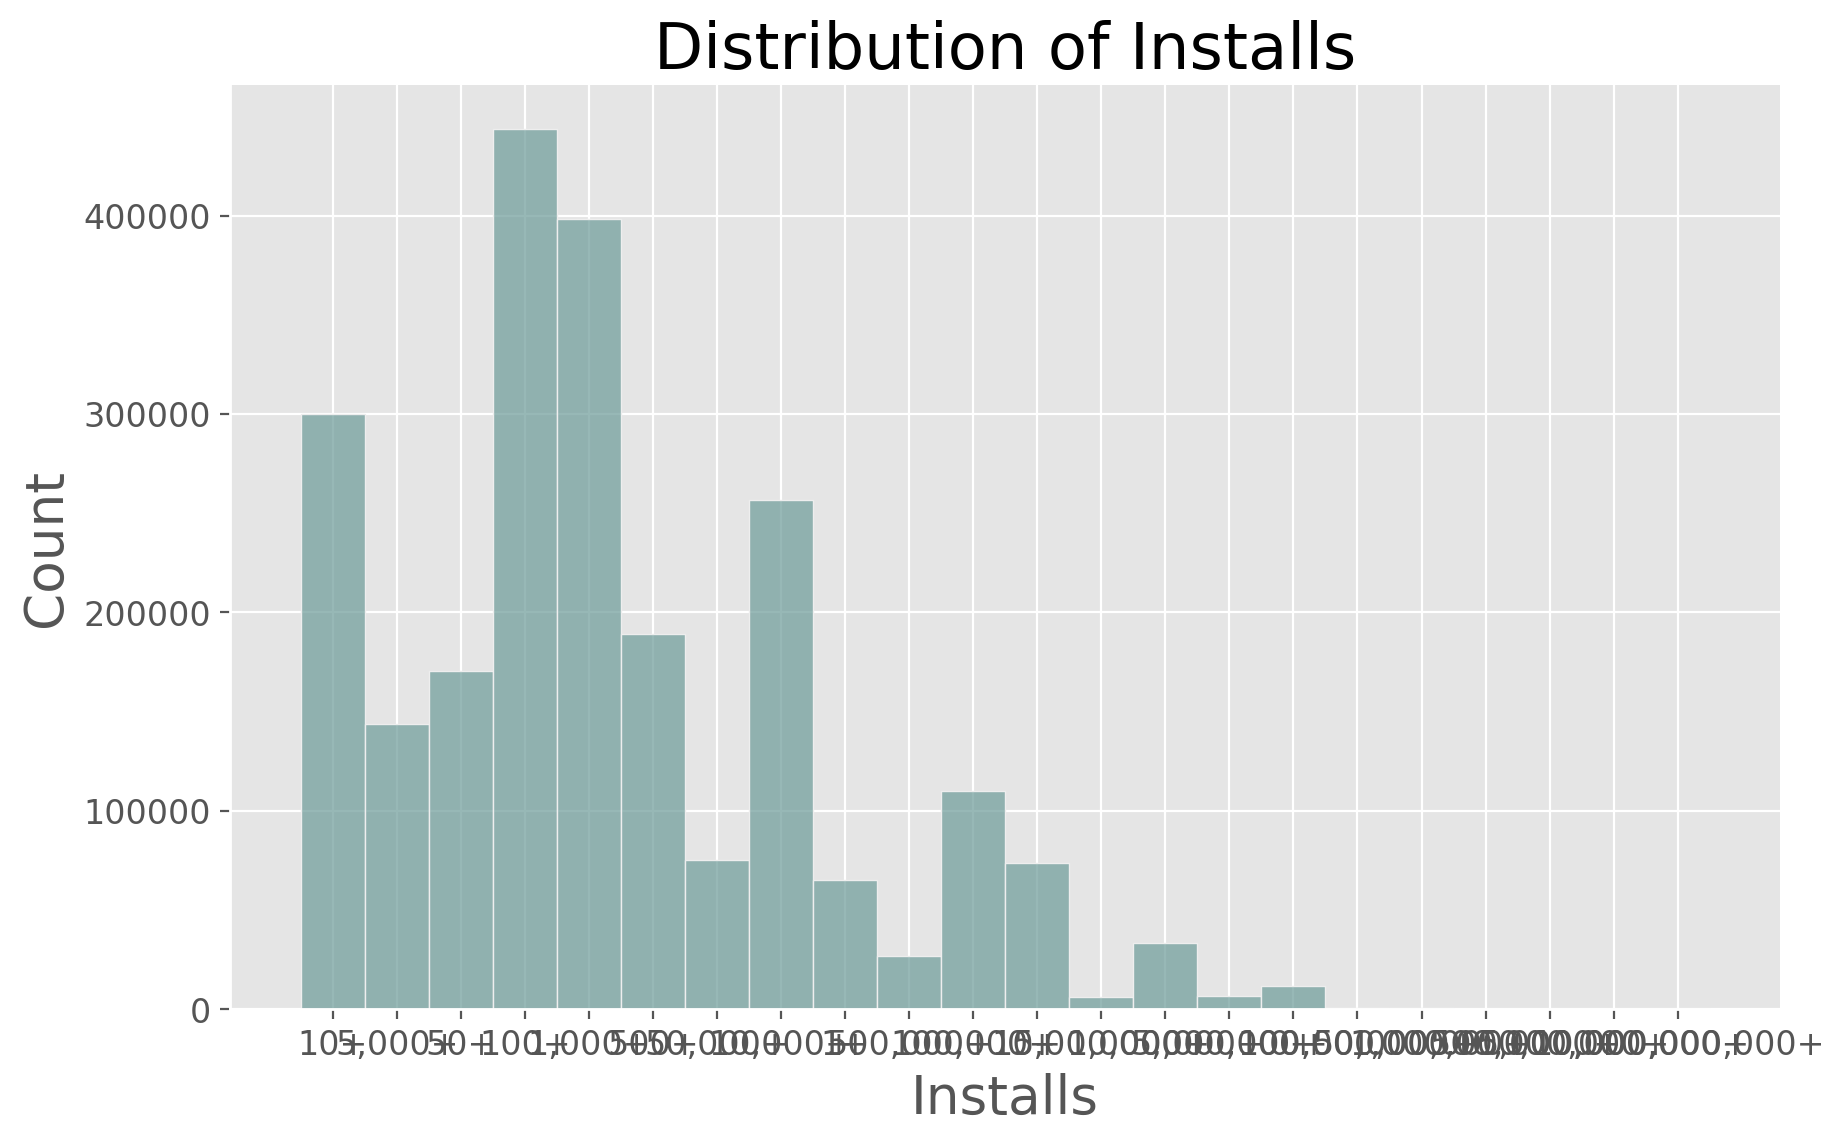

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Minimum Installs', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Minimum Installs')

Text(0.5, 0, 'Minimum Installs')

Text(0, 0.5, 'Count')

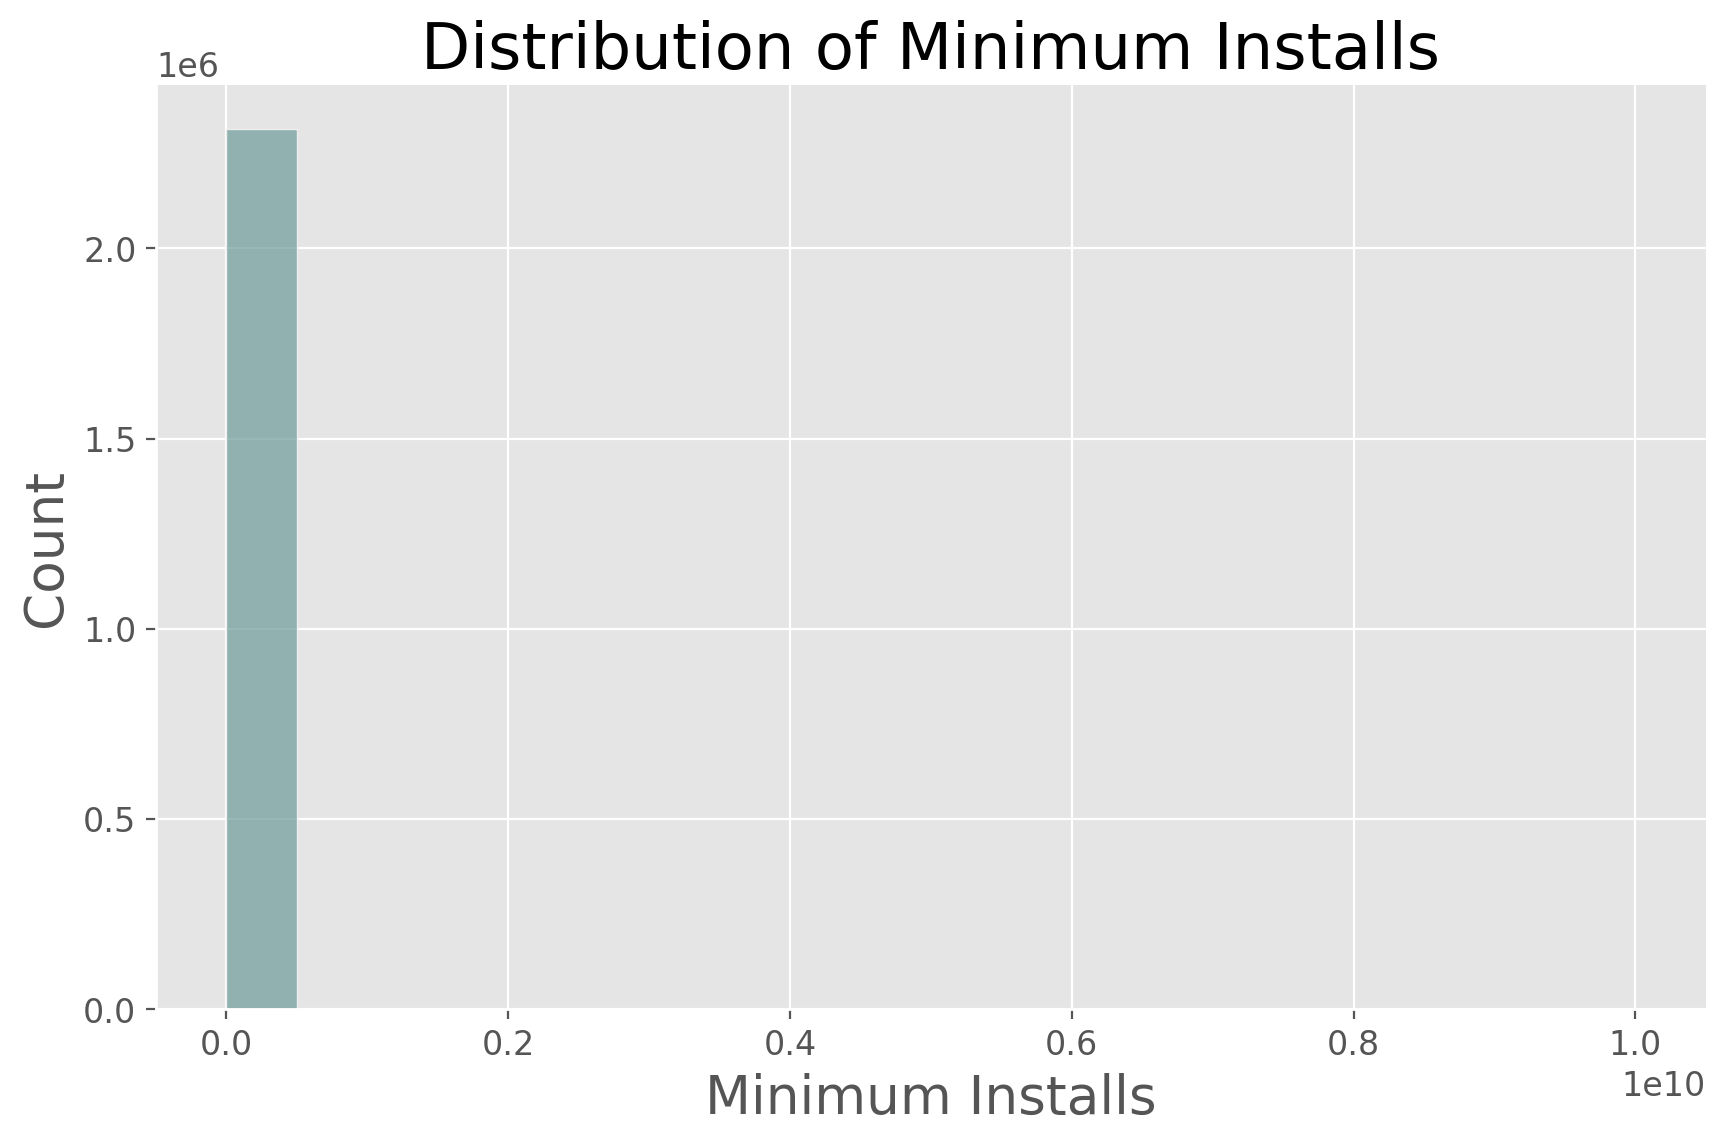

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Maximum Installs', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Maximum Installs')

Text(0.5, 0, 'Maximum Installs')

Text(0, 0.5, 'Count')

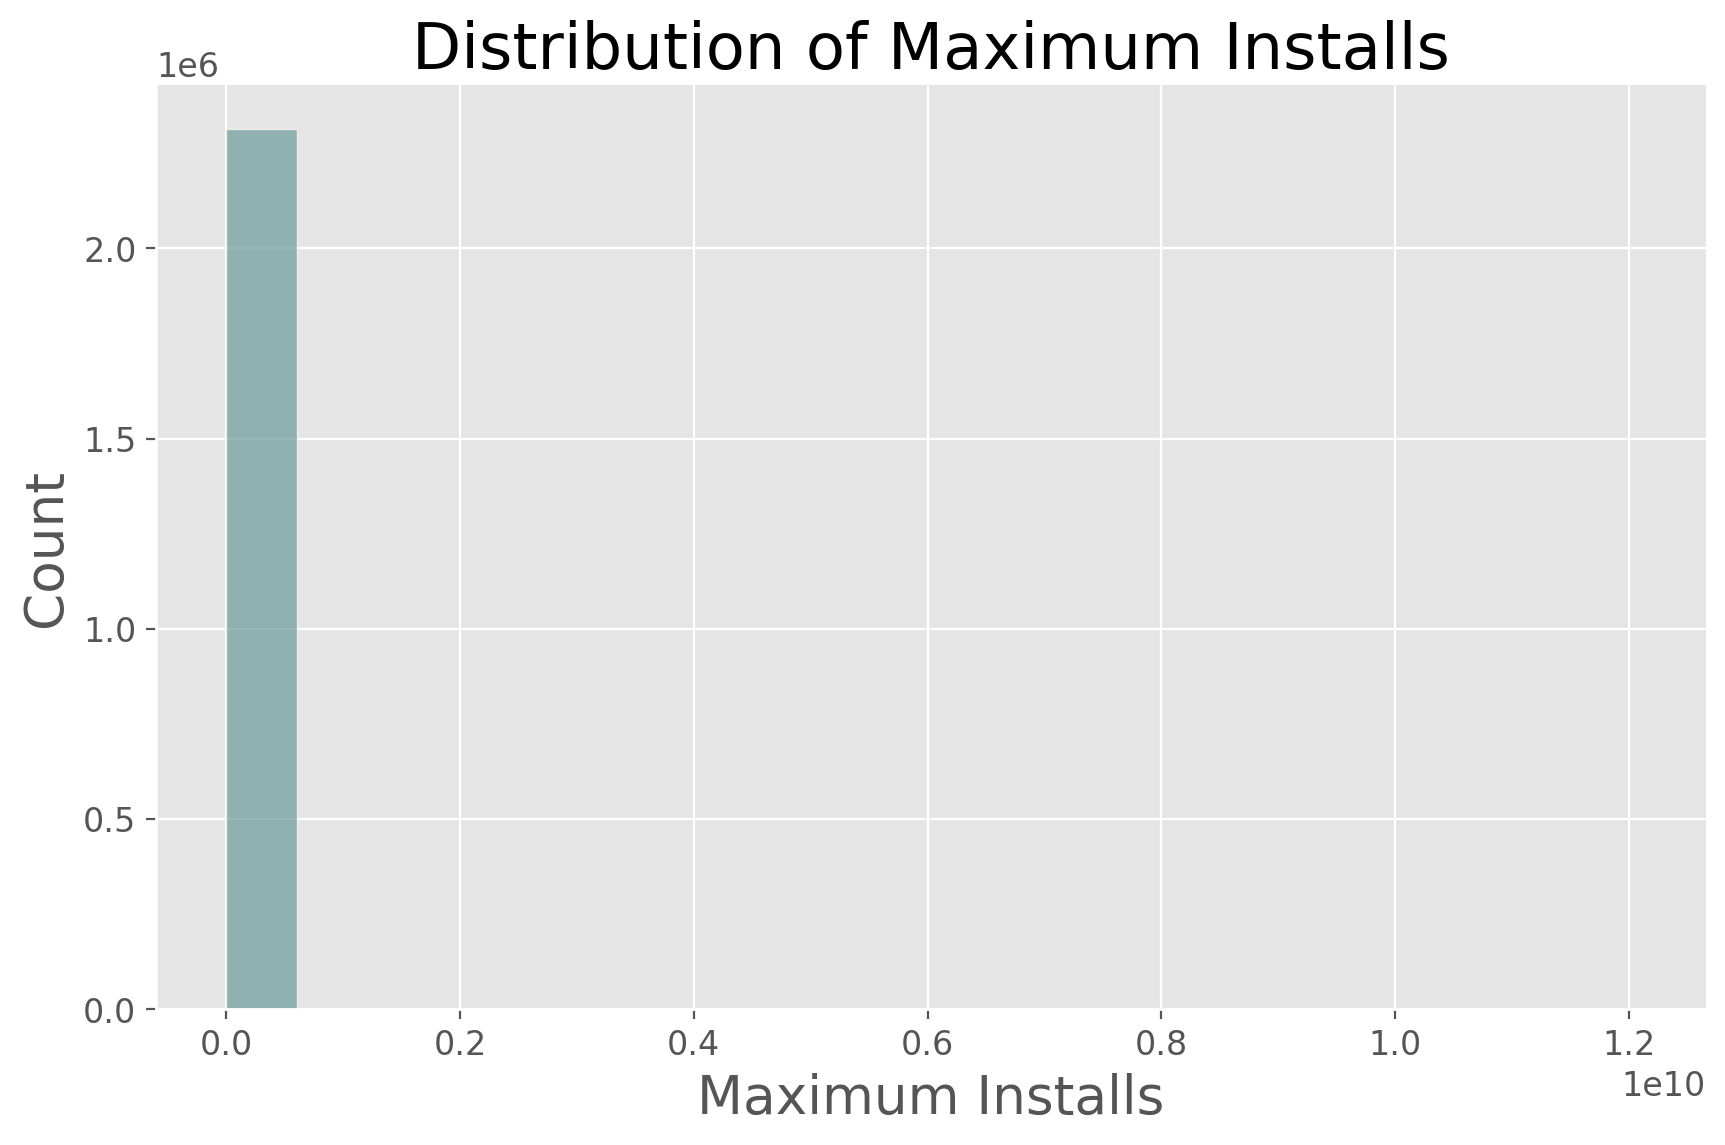

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Price', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Price')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

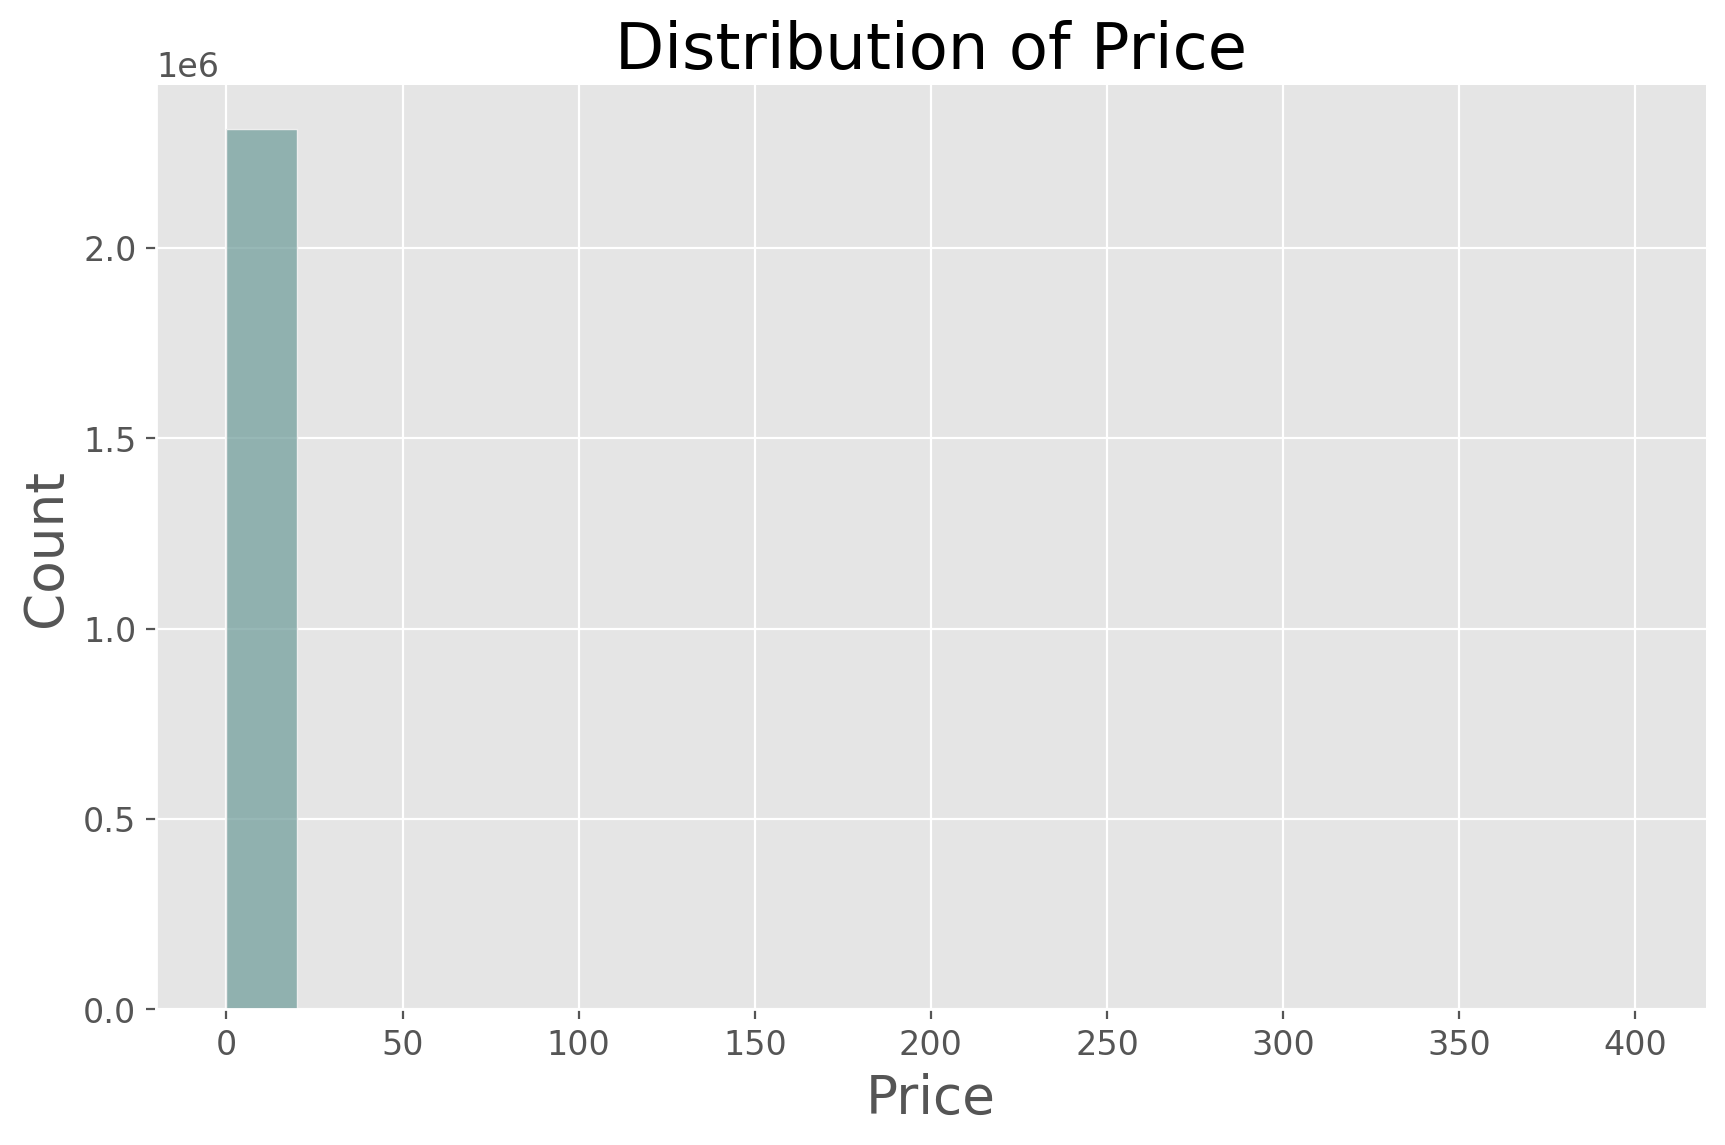

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Size', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Size')

Text(0.5, 0, 'Size')

Text(0, 0.5, 'Count')

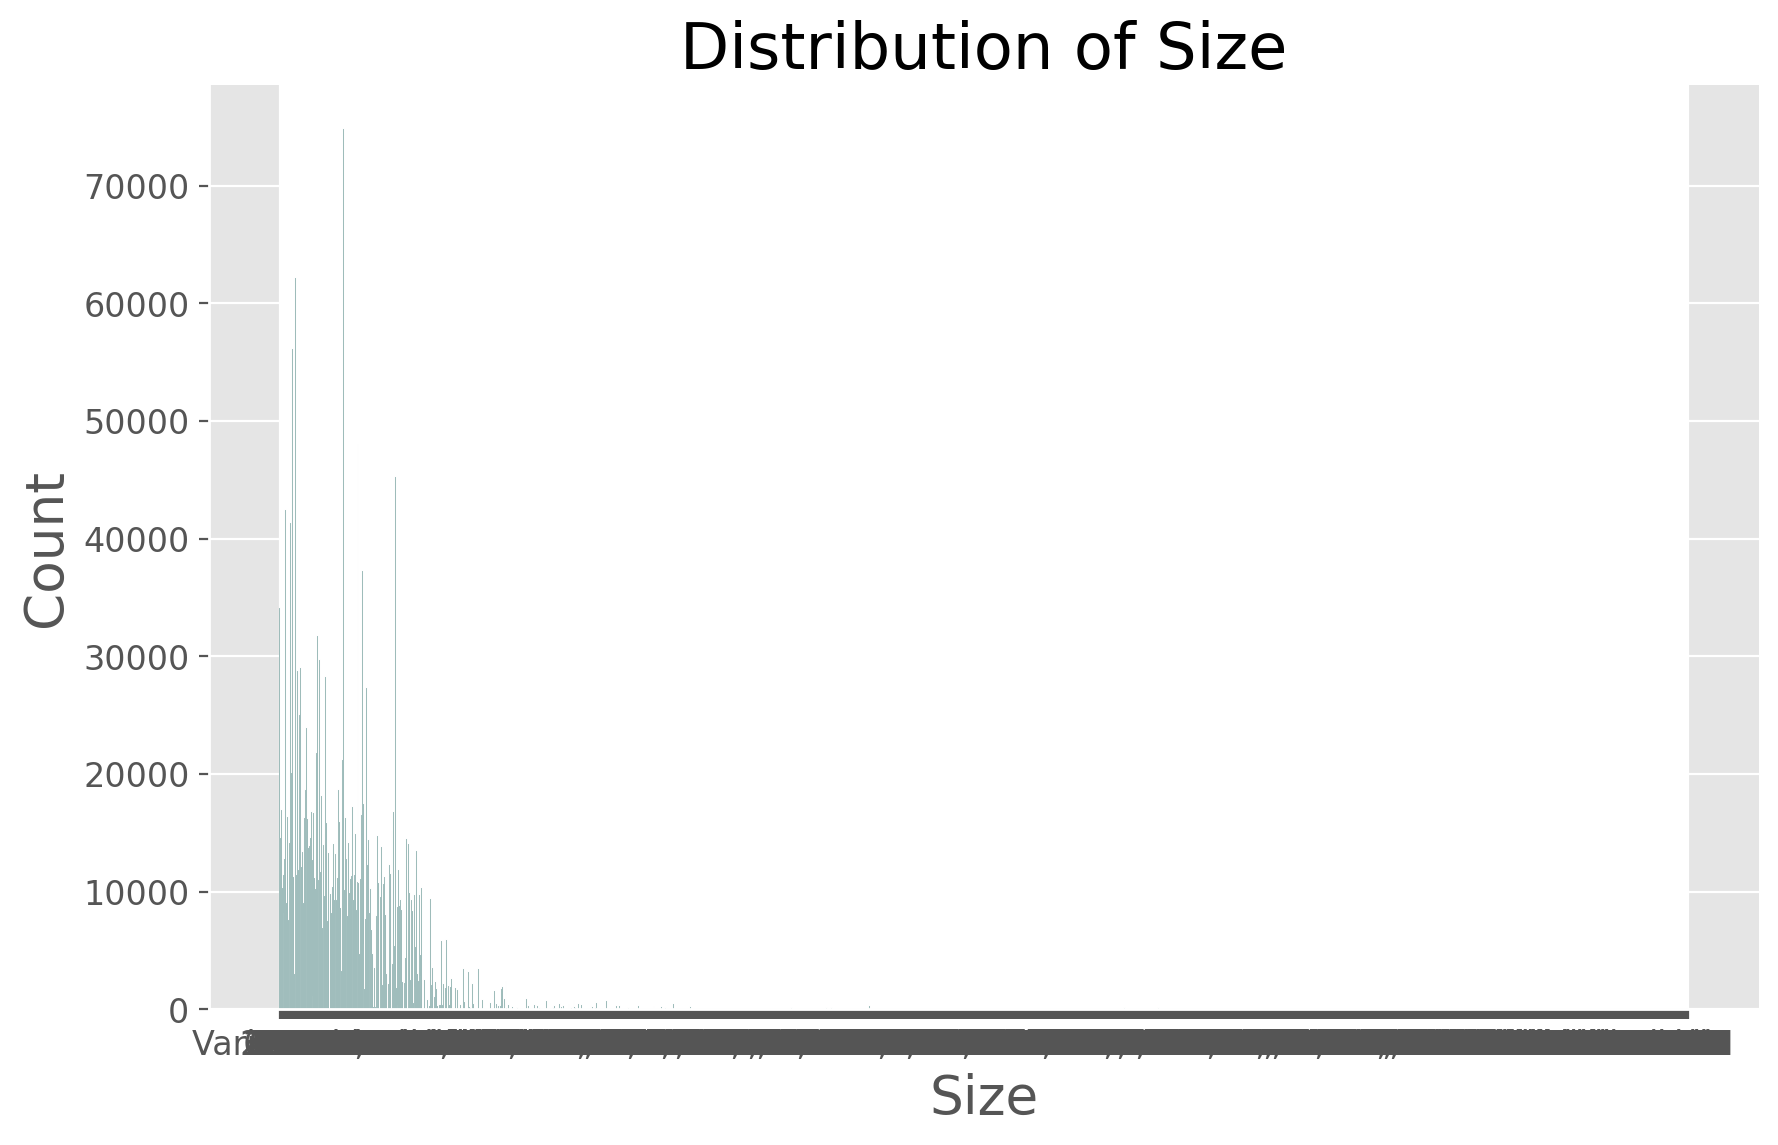

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Category'>

Text(0.5, 1.0, 'Distribution of Category')

Text(0.5, 0, 'Category')

Text(0, 0.5, 'Count')

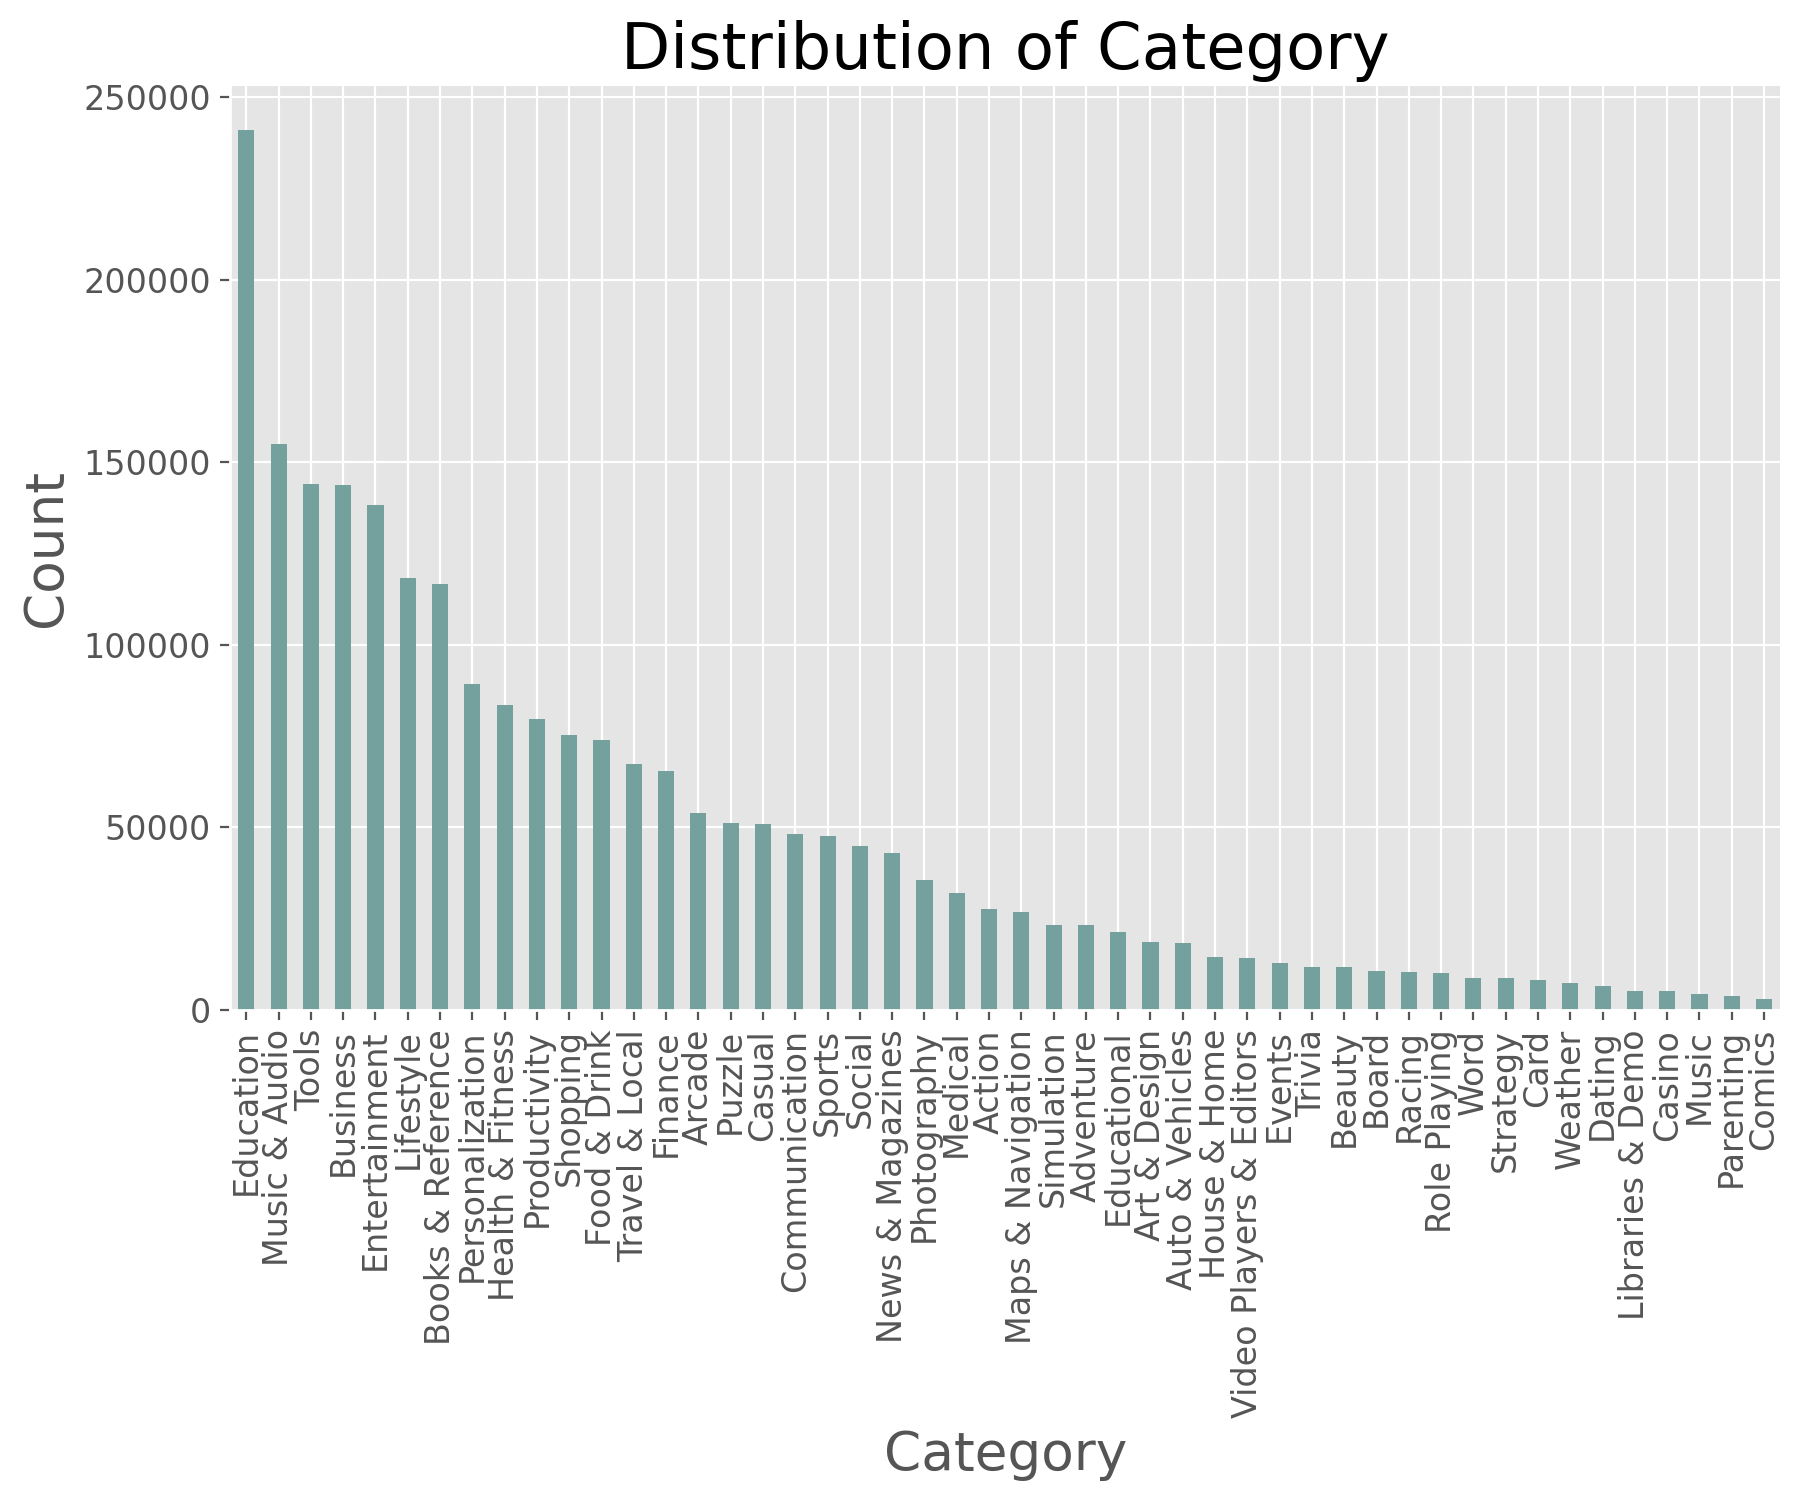

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Free'>

Text(0.5, 1.0, 'Distribution of Free')

Text(0.5, 0, 'Free')

Text(0, 0.5, 'Count')

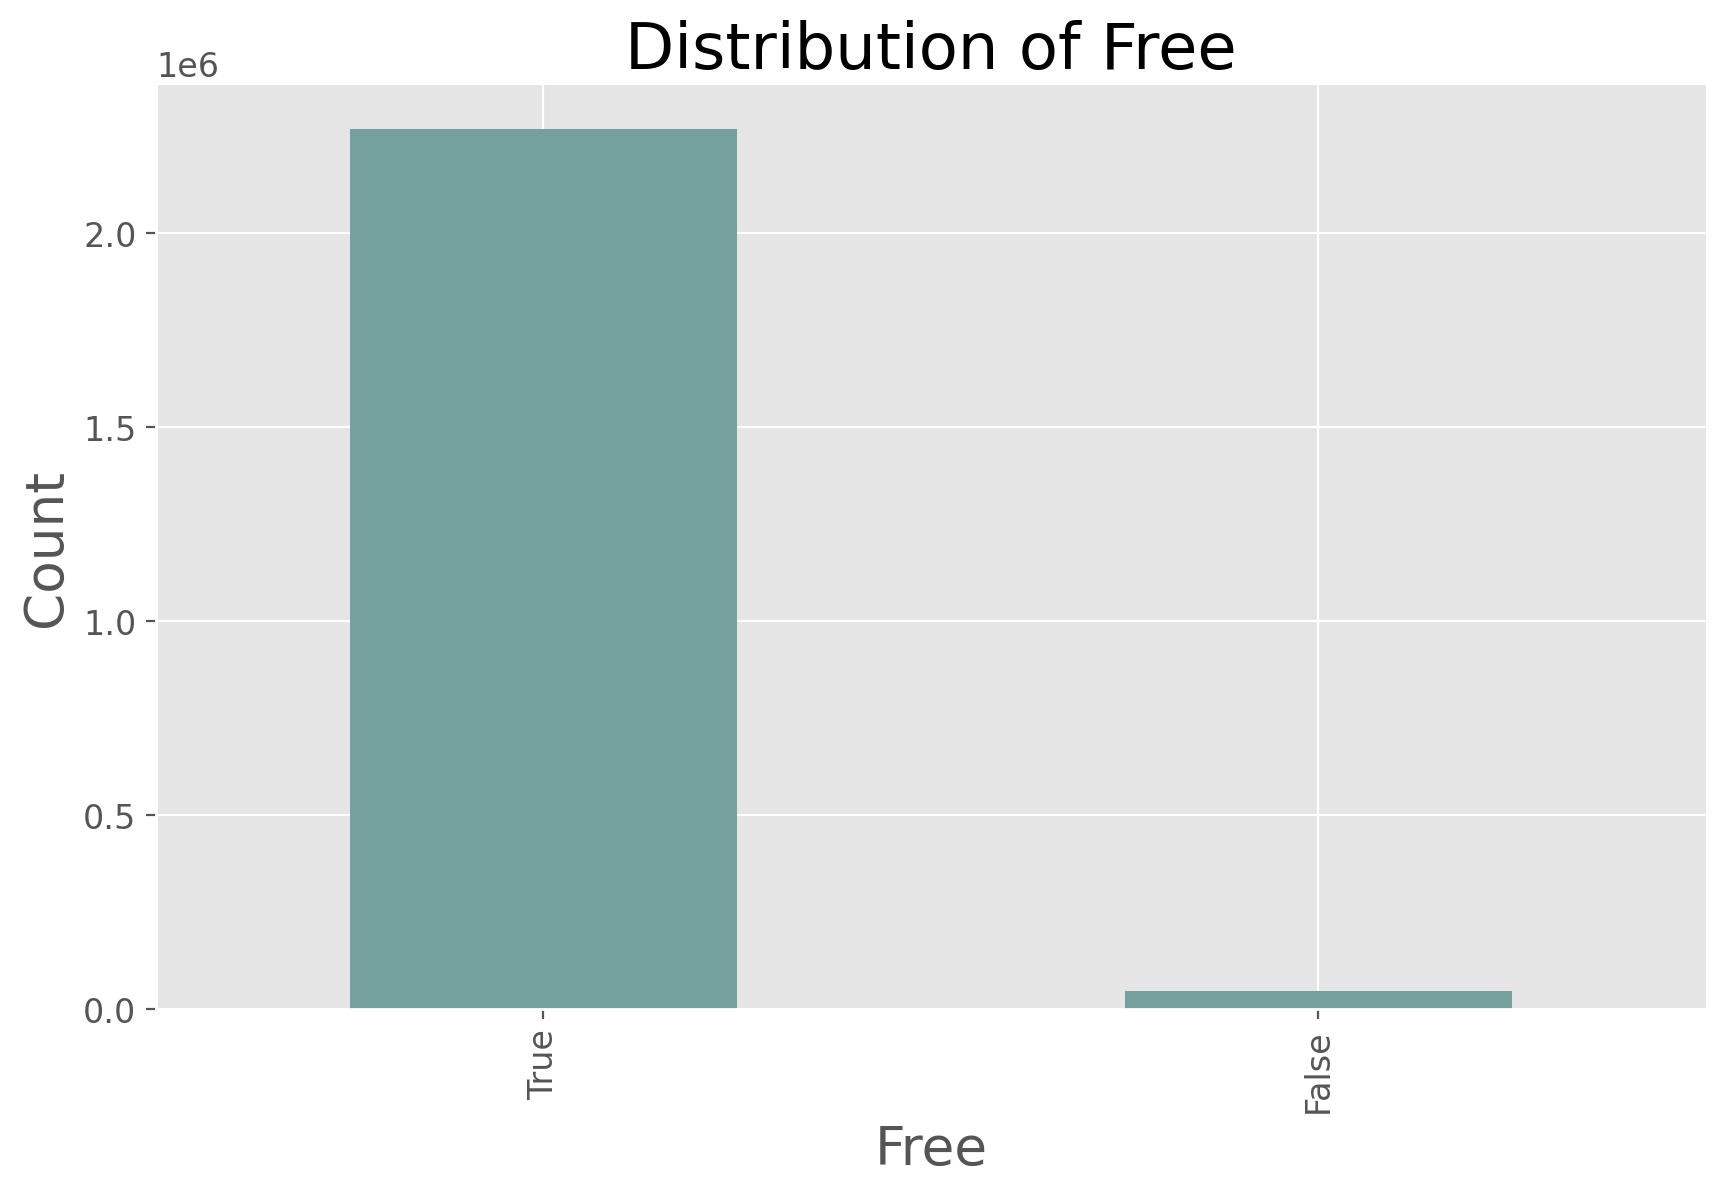

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Currency'>

Text(0.5, 1.0, 'Distribution of Currency')

Text(0.5, 0, 'Currency')

Text(0, 0.5, 'Count')

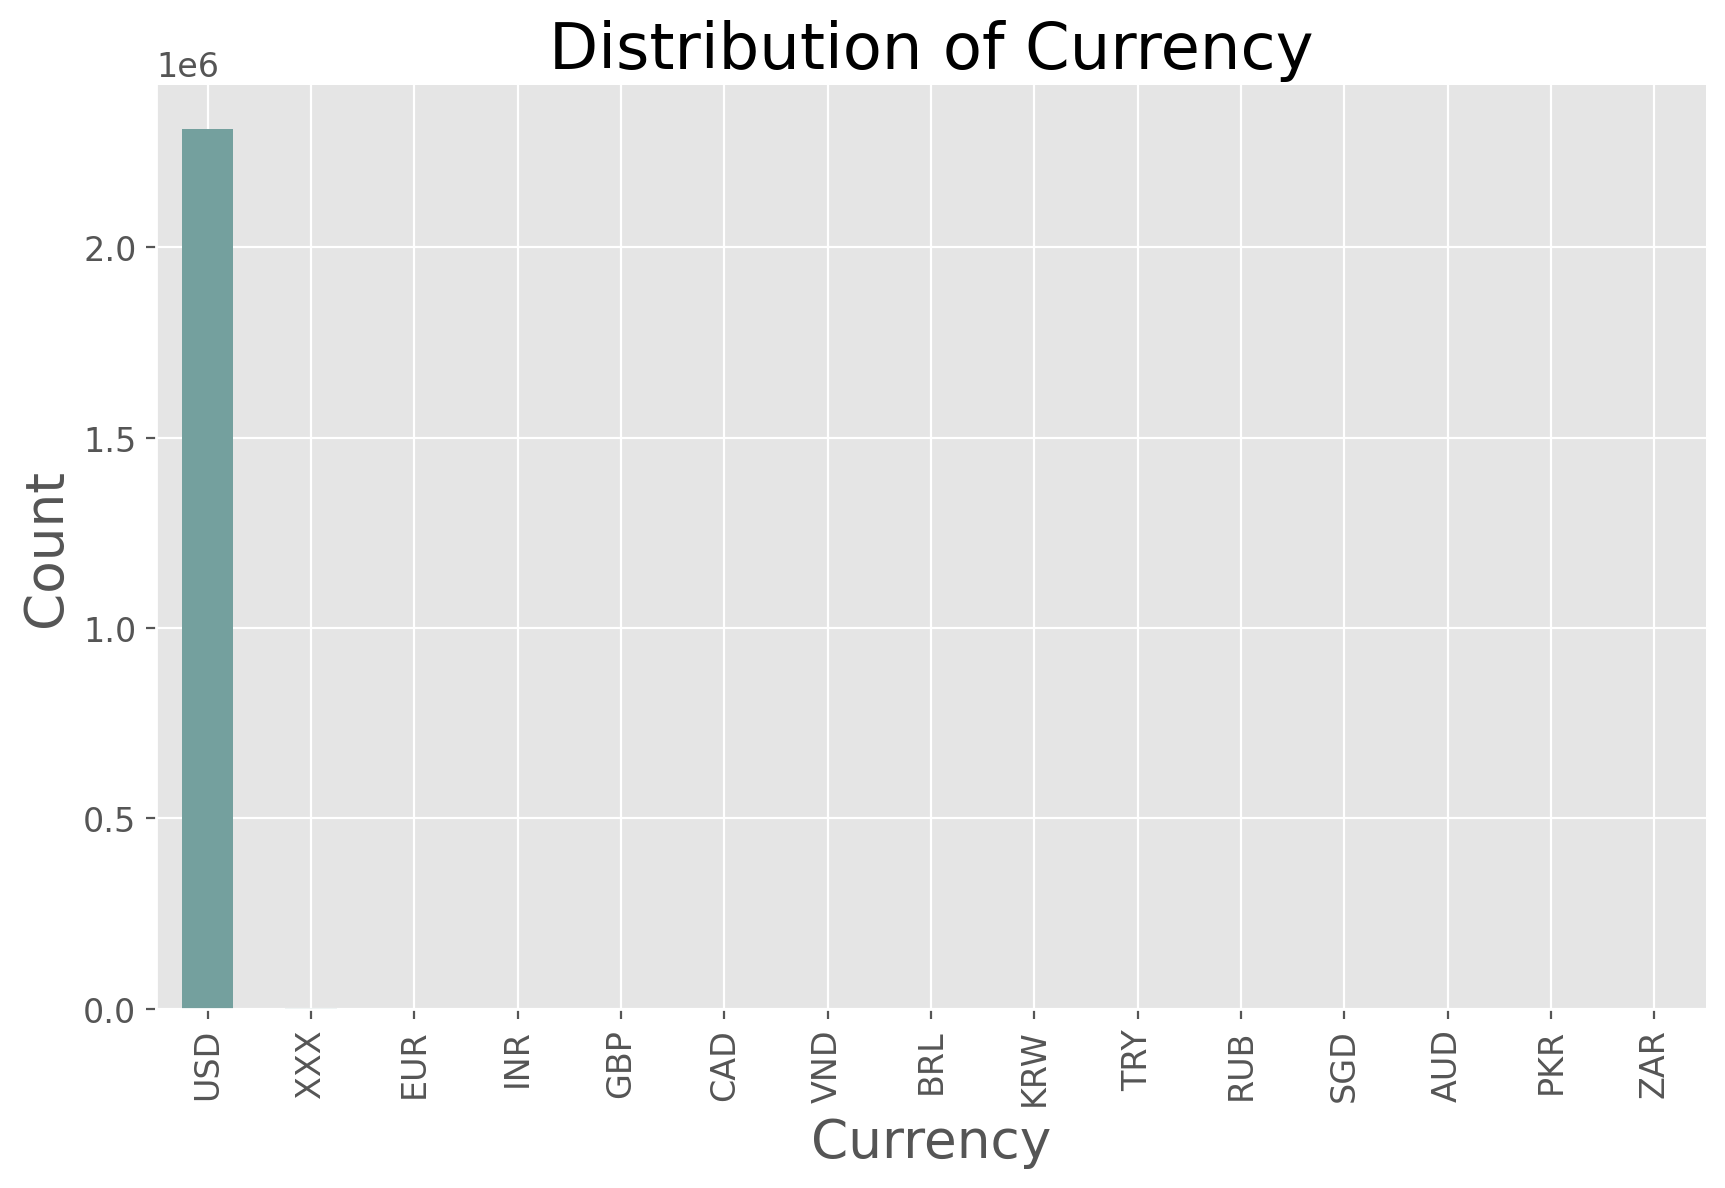

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Content Rating'>

Text(0.5, 1.0, 'Distribution of Content Rating')

Text(0.5, 0, 'Content Rating')

Text(0, 0.5, 'Count')

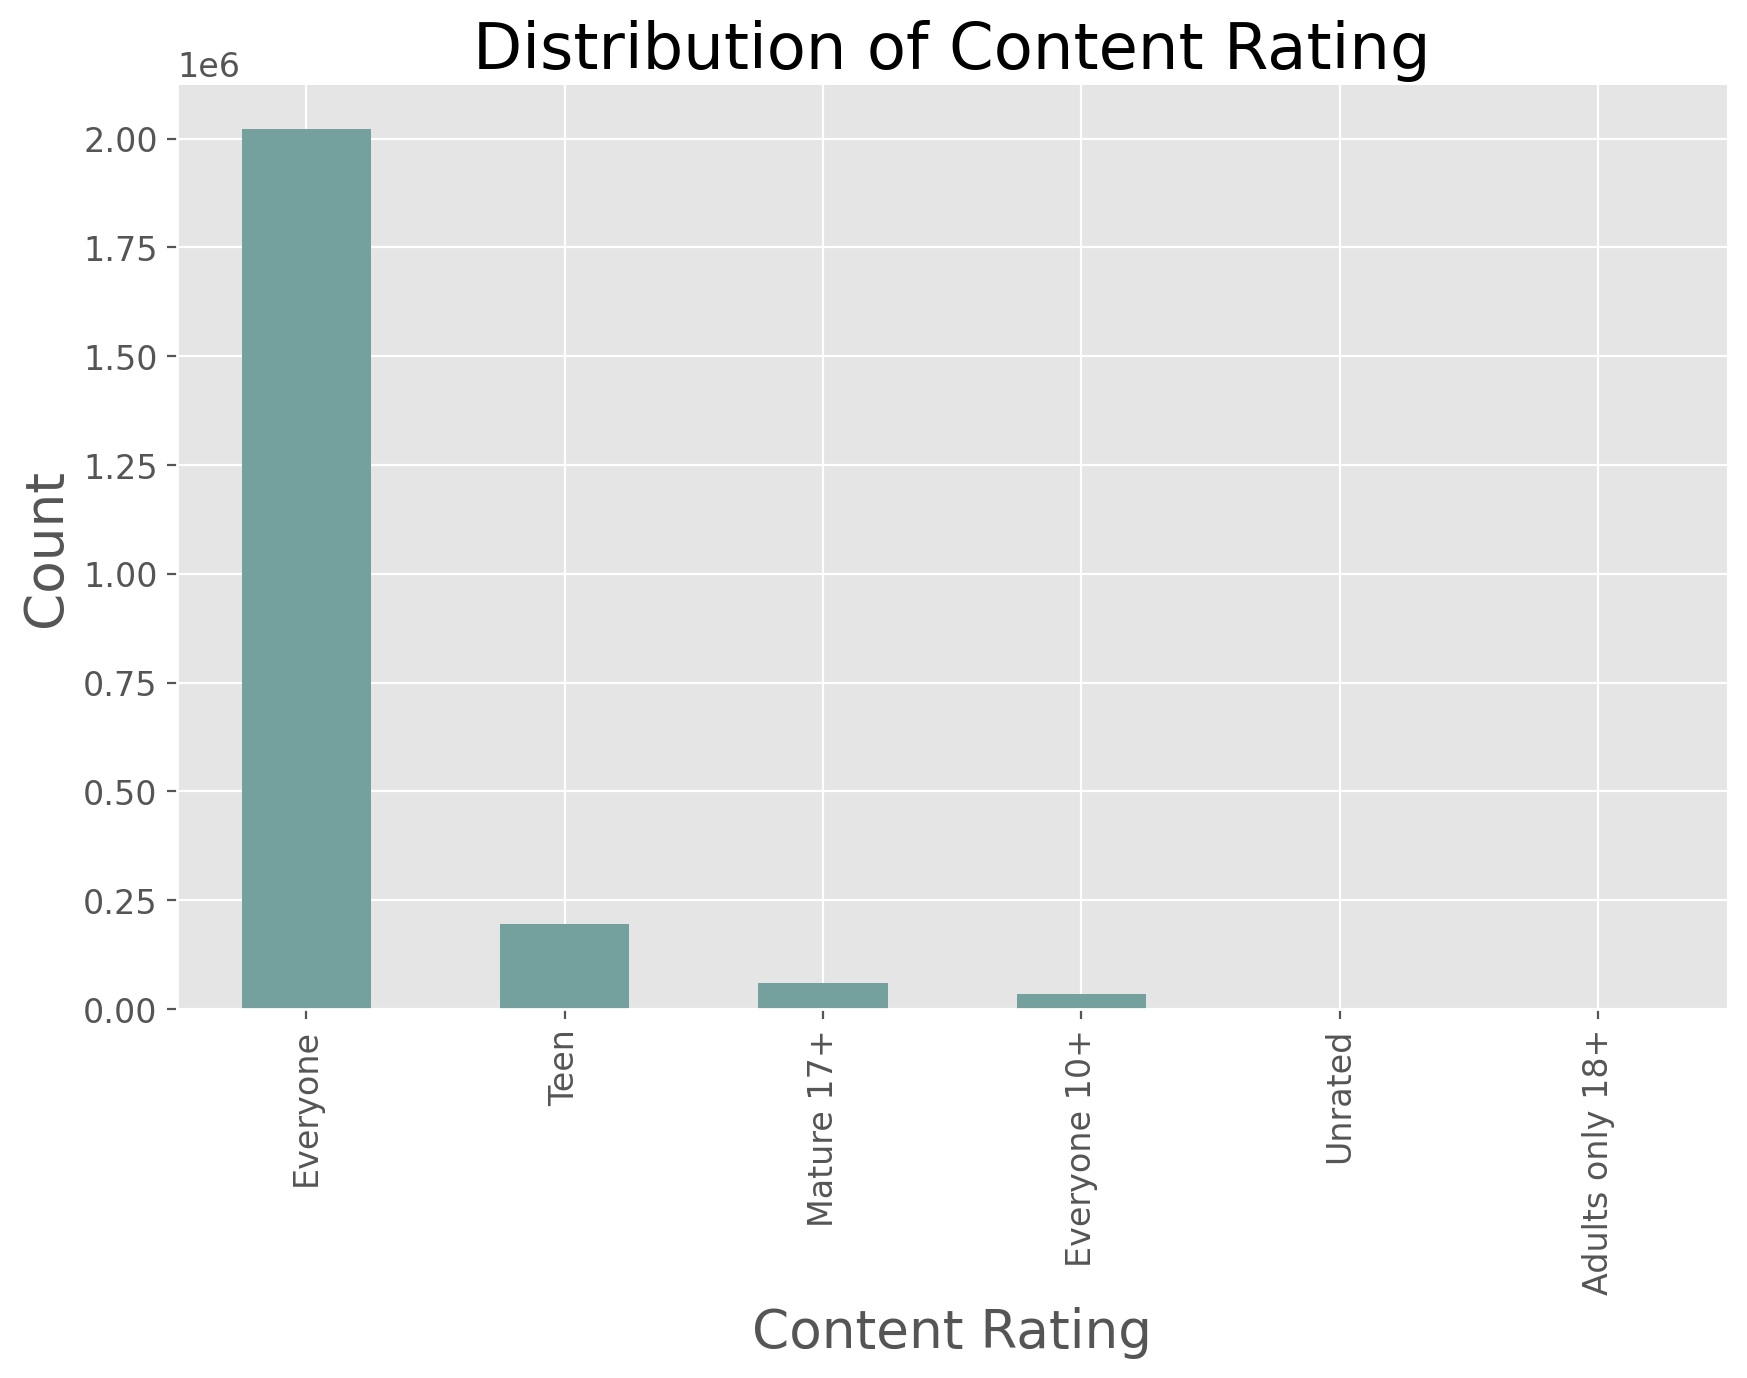

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Ad Supported'>

Text(0.5, 1.0, 'Distribution of Ad Supported')

Text(0.5, 0, 'Ad Supported')

Text(0, 0.5, 'Count')

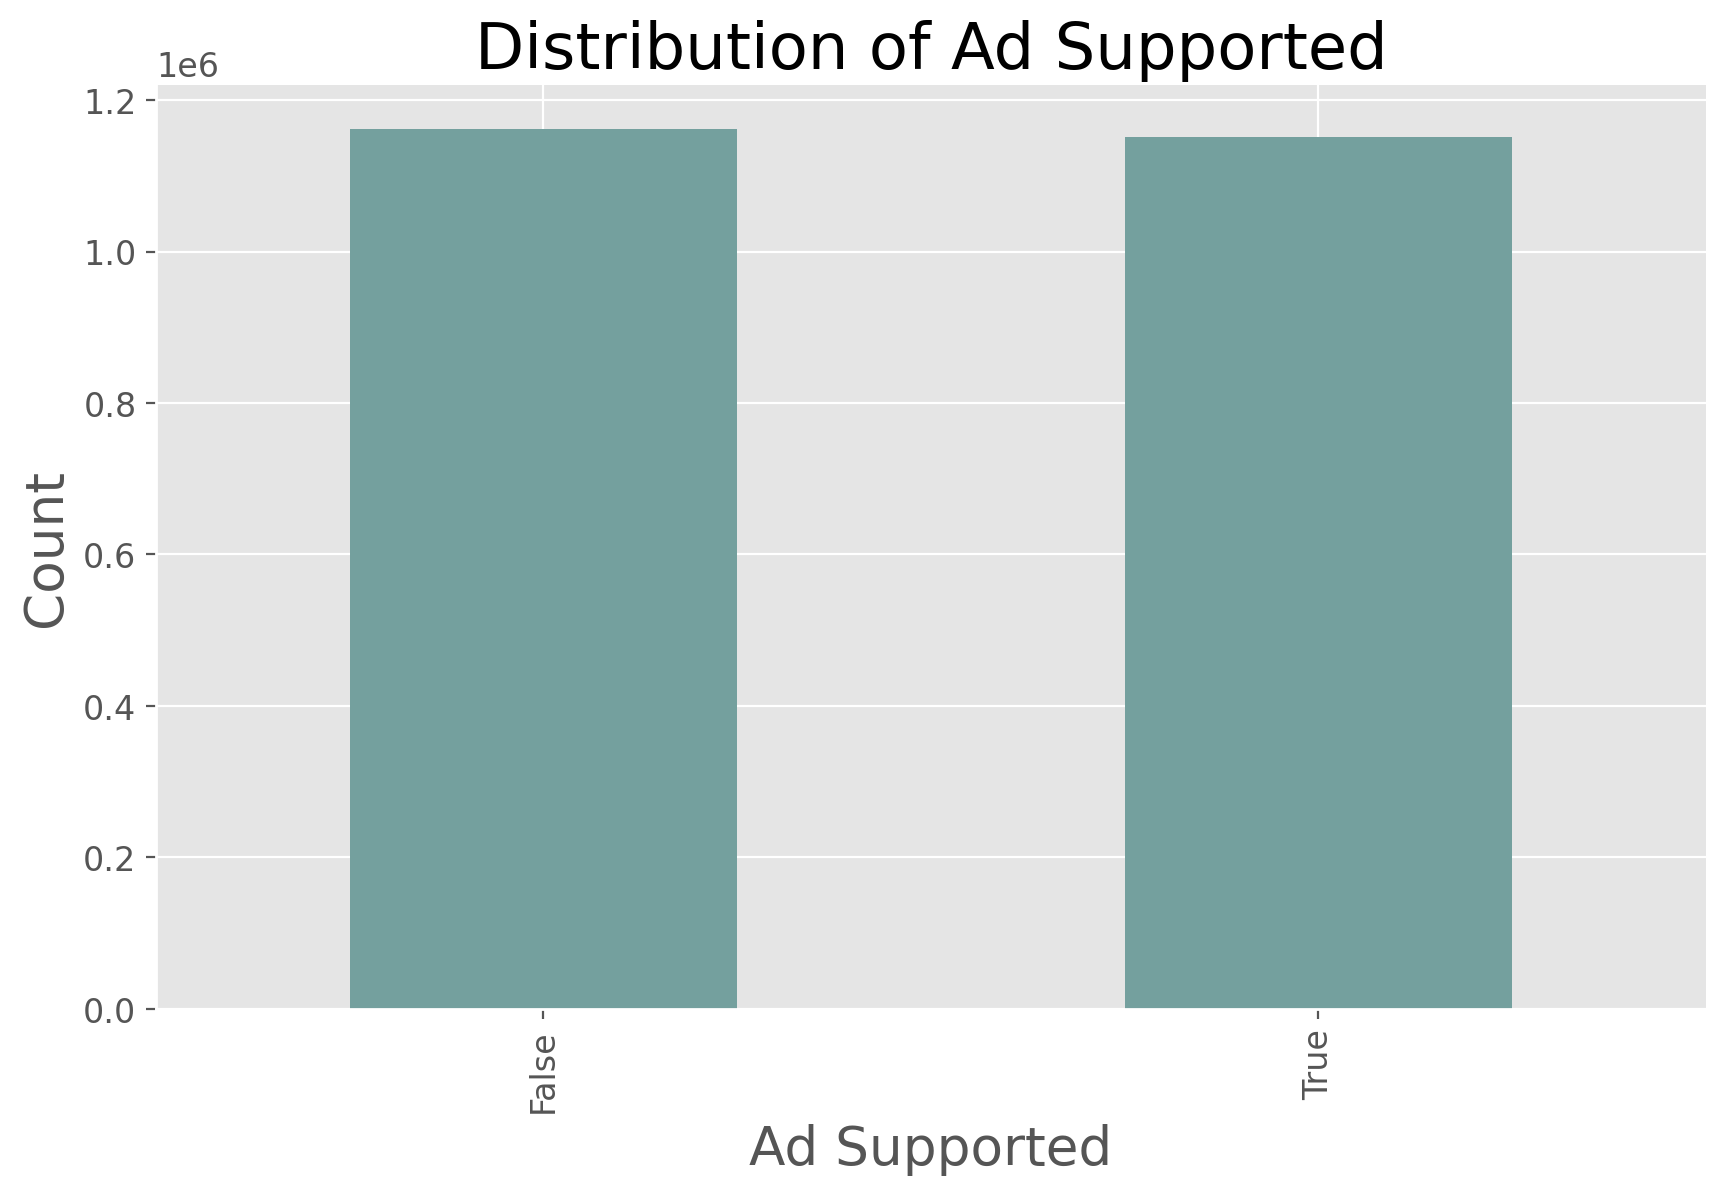

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='In App Purchases'>

Text(0.5, 1.0, 'Distribution of In App Purchases')

Text(0.5, 0, 'In App Purchases')

Text(0, 0.5, 'Count')

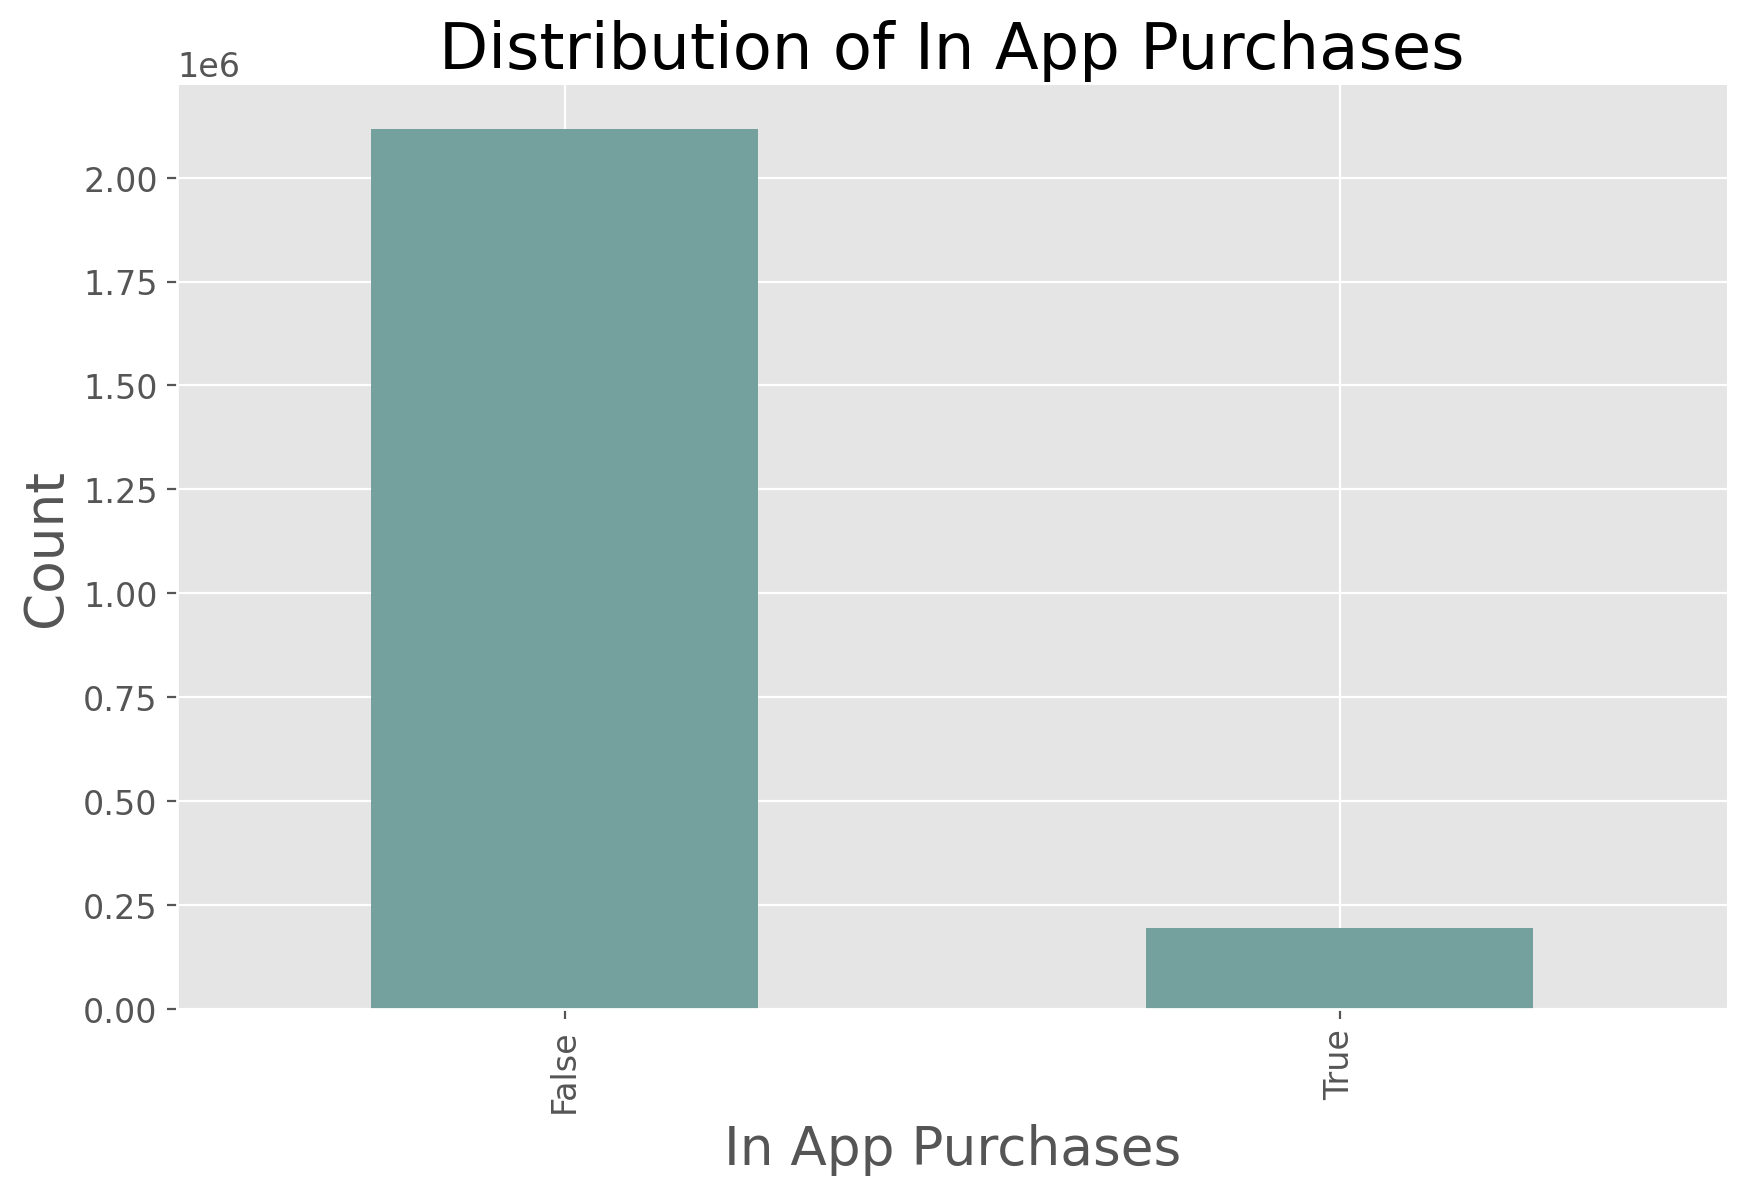

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Editors Choice'>

Text(0.5, 1.0, 'Distribution of Editors Choice')

Text(0.5, 0, 'Editors Choice')

Text(0, 0.5, 'Count')

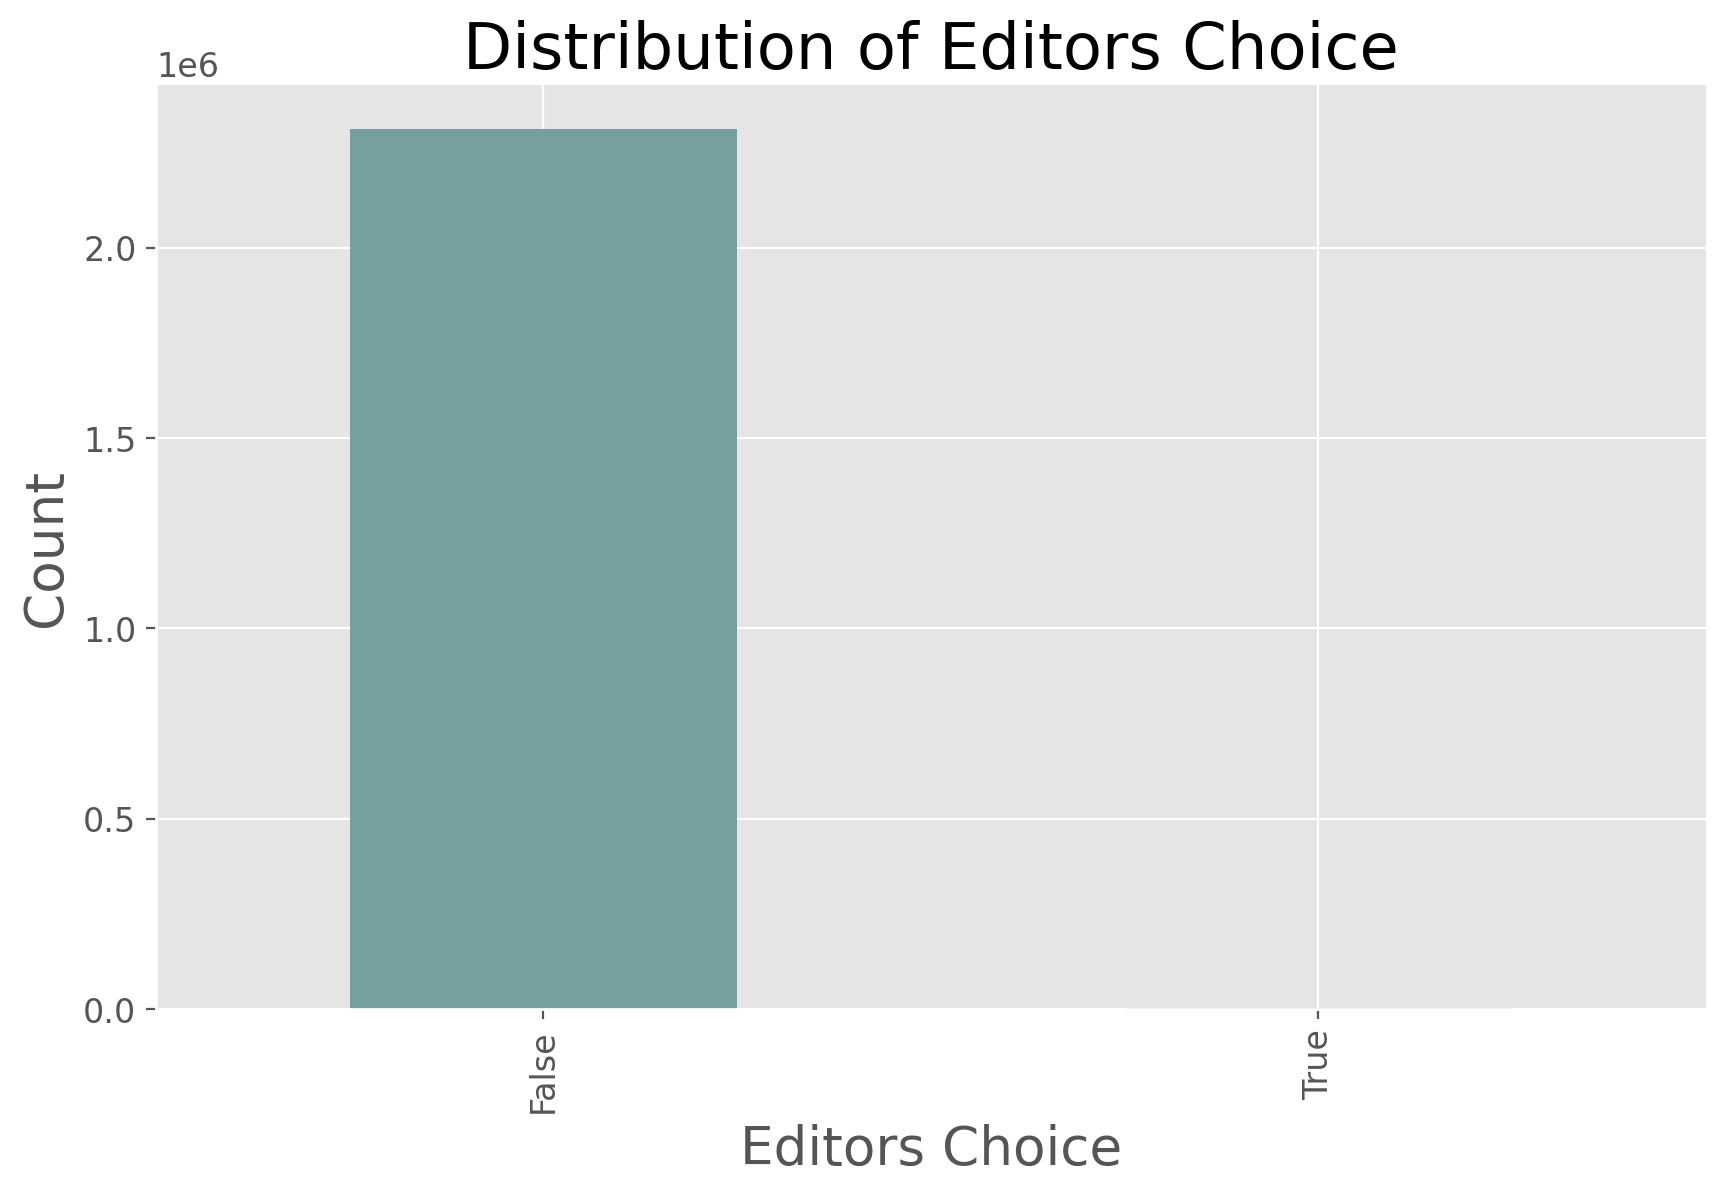

In [26]:
# List of numerical columns for which to create histograms
num_cols = ['Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs', 'Price', 'Size']

# List of categorical columns for which to create bar plots
cat_cols = ['Category', 'Free', 'Currency', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice']

# Create a histogram for each numerical column
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col].dropna(), bins=20, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Create a bar plot for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

To move forward with the data exploration project, we need to clean and tidy the data. This involves handling missing values, removing duplicates, converting data types, and dealing with outliers. Once the data is cleaned, redo exploratory data analysis to gain insights into the app market. We will use Python and its data analysis libraries, such as Pandas and Matplotlib, to perform these tasks.